# TMDB Movie Dataset Analysis

Analysing a Dataset about movies that is collected from The Movies Database starting from year 1960 - 2015GC.  
  
In this notebook I will start our analysis from just taking a look at what the dataset looks like to deduce conclusions for the questions like what are the key features that lead to a commercial success or flop of a movie.  

## Table of Content
  
<ul>
    <li><a href="#import">Importing Necessary Modules</a></li>
    <li><a href="#load">Loading the Dataset</a></li>
    <li><a href="#describe">Describing the Dataset</a></li>
    <li><a href="#question">Questions to Answer</a></li>
    <li><a href="#helper">Helper Functions</a></li>
    <li>
        <a href="#wrangle">Data Wrangling</a>
        <ul>
            <li><a href="#drop_column">Dropping Columns</a></li>
            <li><a href="#drop_null">Dropping Null Values</a></li>
            <li><a href="#drop_duplicate">Dropping Duplicates</a></li>
            <li>
                <a href="#clean_datatype">Cleaning Data Types</a>
                <ul>
                    <li><a href="#change_release_date">Changing Release Date Datatype to Datetime</a></li>
                    <li><a href="#change_vote_count">Changing Vote Count Values to Millions</a></li>
                </ul>
            </li>
        </ul>
    </li>
    <li>
        <a href="#eda">EDA (Exploratory Data Analysis)</a>
        <ul>
            <li><a href="#replace_zero">Replacing Zero Values</a></li>
            <li><a href="#drop_zero">Dropping Zero Revenue Values</a></li>
        </ul>
    </li>
    <li>
        <a href="#answer_question">Answering Questions</a>
        <ul>
            <li><a href="#popularity_question">Popularity Related Questions</a></li>
            <li><a href="#director_question">Director Related Questions</a></li>
            <li><a href="#runtime_question">Runtime Related Questions</a></li>
            <li><a href="#genre_question">Genre Related Questions</a></li>
            <li><a href="#company_question">Production Company Related Questions</a></li>
            <li><a href="#budget_question">Budget and Revenue Related Questions</a></li>
            <li><a href="#release_question">Released Year Related Questions</a></li>
        </ul>
    </li>
    <li>
        <a href="#conclusion">Conclusion</a>
    </li>
    <li>
        <a href="#resource">Resources</a>
    </li>
</ul>

<a id="import"></a>
## Importing Necessary Modules

The following modules are required to analyse the data: `pandas`, `numpy`, `matplotlib`, and `seaborn`.  
  
The above modules aren't came with Python by default, they need to be installed explicitly using Python's package manager `pip`.

> `pip install module_name` => Eg. `pip install pandas`  
> `pip install module_1 module_2 .... module_n` => Eg. `pip install pandas numpy matplotlib seaborn`

The first syntax is used to install a single module; and the second one is to install multiple modules at a time.

In [1]:
# Importing the above mentioned modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting a theme for the graphs
sns.set_style('darkgrid')
my_colors = [
    "#885053ff", "#fe5f55ff", "#777da7ff", "#FF00FF", "#5733FF", "#33FF57", "#C6CA53", "#154360", "#FF0000", "#145A32", 
    "#E74C3C", "#8E44AD", "#3498DB", "#16A085", "#2ECC71", "#F39C12", "#D35400", "#00FFFF", "#DFFF00", "#DE3163"
]
sns.set_palette(sns.color_palette(my_colors))

In [2]:
# Just to see the color palette
# sns.color_palette()

<a id="load"></a>
## Loading the Dataset

Loading the `csv` file using pandas `read_csv` function

In [3]:
tmdb = pd.read_csv("./Datasets/tmdb-movies.csv", sep=",", index_col='id')
tmdb.head(3)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


A quick look at the information about the dataset, using pandas `info` method.

In [4]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

<a id="describe"></a>
## Describing the Dataset


The dataset have the following attributes
>  
>  
> - **Data Points (Rows)**: 10806
>  
> - **Columns**: 21
>  
> - **Column Names**:       
>   - id: Identification Number
>   - imdb_id: IMDb Identification Number
>   - popularity: Popularity in number
>   - budget: Gross Budget
>   - revenue: Gross Revenue
>   - original_title: Title of the Movie
>   - cast: Cast
>   - homepage: Movie website homepage
>   - director: The person who directed the movie
>   - tagline: 
>   - keywords: 
>   - overview: Overview of the movie 
>   - runtime: How long the movie last
>   - genres: What genres the movie belong to
>   - production_companies: What are the companies produced the movie
>   - release_date: The date the movie was released
>   - vote_count: How many people voted for the movie
>   - vote_average: The average vote rate our of 10
>   - release_year: Released Year
>   - budget_adj: Movie Budget including 2010 inflnation
>   - revenue_adj': Movie Revenue including 2010 inflnation

<a id="question"></a>
## Questions to Answer

Using the above loaded data, I will try to answer the following listed Questions.  
  
I categorized questions to fall under the same column title if the question is about that one specific column. 

- ### Popularity
  1. Does the top 15 most popular movies belong to the top 15 commercially successful movies?
      - What is their ratio to the total profit?
      - What is their rank in terms of `profit`  
  2. Which movies are commercially successful but not popular?
  3. Which movies have the highest `popularity` vs `vote_count` ratio?

- ### Director
  1. Who is the most popular Director?
      - How many movies he/she directed?
      - What are his/her top 5 commercially successful and flopped movies?
  2. Who is the Director with maximum number of Movies Directed?
      - How many movies he/she directed?
      - What are his/her top commercially successful and flopped movies?
      - What year was his/her most popular movie released?
      - How many years it takes him/her to direct all the movies?
  3. Who are the top directors those hold the position 2 - 16?
      - How many movies each of them directed?
  

- ### Runtime
  1. What is the average runtime for successful movies and flopped ones?
  2. What are runtime's top 5 profit values as compared to same runtime movies?
  3. Which runtime got high average vote rate?
  4. Average runtime of movies each year?

- ### Genre
  1. Which genres are most popular?
  2. Which genres are more successful and flopped?
      - What is the percent of successful and flopped movies?
  3. What is genre's vote average?
  4. What genre is popular each year?
  5. How many movies released under the same genre category each year?
  

- ### Production Company
  1. Which production companies are most popular?
  2. What are the top 15 production companies which released highest number of movies?
      - What are the proportion of successful and flopped movies they released?
      - What is their movie per year ratio?


- ### Cast
  1. How many unique star casts found?
      - How many of them participated only in successful and flopped movies?
      - How many of them participated only both in successful and flopped movies?
      - How many of them participated neither in successful nor flopped movies?
  2. Which star casts appear most frequently? (Top 20)
      - On how many movies they appeared?
      - What is their successful and flopped ratio?
      - What is their movie to year ratio?
  

- ### Budget and Revenue
  1. What is the average budget for both commercial successful as well as flopped movies?
  1. How much percent of the Movies are Commercially successful as well as Flopped?
  2. What are the top 20 movies that got high profit proportion to their budget?
  3. What are the features associated with profit success?
      - What are their relationship with Production Company, Director, Genre, and Cast features?
  4. Does having more budget mean getting more popular or revenue?
  5. Does the `budget`, `revenue`, and `profit` growing over the years?

- ### Released Year
  1. What year was the most successful year in the movie industry?
      - How many successful movies got released that year?
      - What was their average budget?
      - What is the proportion of successful movies?
  2. What year was the most unsuccessful year in the movie industry?
      - How many flopped movies got released that year?
      - What is the proportion of unsuccessful movies?
  4. Which month has the highest released number of movies?
      - Every year
      - Over all
  5. Which month made the Highest Average Net Profit?
      - Every year
      - Over all
  6. What is the average popularity for each year?
      - Which year has the highest and lowest values?
  7. Does the number of released movies increased over the rears?

<a id="helper"></a>
## Helper Functions

Here under there listed the helper function I will use through out my analysis.  

<a id="grapher"></a>
### Graph Plotting

This analysis will include a bunch of graphs so I coded a helper function to smoothen the analysis process

In [5]:
def plot_graph(
    df: pd.DataFrame, columns: str|list, 
    title: str, ylabel: str, figsize: tuple=(16, 8), 
    inc_mean: bool=False, graph_type: str="line",
    xticks: str='original_title',
    legend: list=[], legend_loc: str="upper left", **kwargs):
    """Draws a line or bar graph along with optional mean value of a data frame passed

    Args:
        df (pd.DataFrame): a Data Frame to extract the column to draw the graph
        columns (str|list): a column name/names from the data frame to draw the graph on
        figsize (tuple): the graph size
        title (str): a graph title
        ylabel (str): a label for y axis
        inc_mean (bool, optional): does the graph should include mean line or not. Defaults to False.
        graph_type (str, optional): a string either 'line' or 'bar'. Defaults to "line".
        xticks (str, optional): a column name used for x-axis ticks. Defaults to 'original_title'.
        legend (list, optional): a list for a legend. Defaults to []
        legend_loc (str, optional): where a legend should be located. Defaults to 'upper left'
        **kwargs (any): additional arguments for the graph
    """
    # clear the window first
    plt.clf()
    fig, ax = plt.subplots(figsize=figsize)

    # setup
    length = df.shape[0]
    x_tick_points = np.linspace(1, length, length)

    # getting the graph type
    function = ax.plot if graph_type == 'line' else ax.bar

    # getting a bar width
    bar_width = kwargs.get('width', 0)

    # drawing the graph
    if type(columns) in [str, tuple, int]:
        function(x_tick_points, df[columns], **kwargs)
    elif type(columns) == list:
        for idx, column in enumerate(columns):
            function(x_tick_points + idx * bar_width, df[column], **kwargs)

    # Drawing the mean
    if inc_mean:
        mean_value = round(df[columns].mean(), 2)
        ax.plot(x_tick_points, np.repeat(mean_value, length), "--", color=np.random.choice(my_colors))

    x_tick_position = 0
    if graph_type == "bar" and type(columns) == list:
        bar_width = bar_width or 0.6
        x_tick_position = bar_width * ((len(columns) - 1) / 2)

    if inc_mean and not legend:
        # Changing column names to legend lists
        columns = [columns] if type(columns) in [str, int, tuple] else columns
        columns = [' '.join(str(column).split('_')).title() for column in columns]
        legend += columns
        legend.append("Mean")
    elif len(legend) and inc_mean:
        legend.append("Mean")

    if len(legend):
        plt.legend(legend, loc=legend_loc, fontsize=12)

    legend.clear()
    plt.title(title, fontsize=18)
    plt.ylabel(ylabel)
    plt.xticks(x_tick_points + x_tick_position, df[xticks], rotation=45, horizontalalignment='right');

<a id="explode"></a>
### Multi Valued Column Expansion

Let me try to explain what the function will do by using the `director` column as an example.  
  
Since the `director` column is a multiple value column separated by `|`, I need to take care of it before I start answering the questions related with `director` column.  
  
The following output justifies what I wanted to say.

In [6]:
tmdb[tmdb.index == 14938]['director']

id
14938    Matt Checkowski|Kurt Mattila
Name: director, dtype: object

The above result proves the movie is directed by two directors and their names are separated by `|`.  
  
To smoothen the `director` column I need to expand director column values in to multiple rows. The result I am expecting after such operation will be as follows:
| id | .... | Director|
|-------|---------|--------|
| 14938 | .... | Matt Checkowski |
| 14938 | .... | Kurt Mattila |

That means, the same movie expanded to two different directors each one having their own row.  
  
To achieve such result, I need to follow the following steps:
1. Split the string `director` column by `|`
2. Explode the whole dataset on `director` column
  
**NOTE**: The expansion operation will graw the size of the dataset depending on how many multiple values are found in the multi-valued column.

In [7]:
def expand_multivalue_columns(df: pd.DataFrame, col: str, delimeter: str="|"):
    """Expanding multi-valued column into multiple rows

    Args:
        df (pd.DataFrame): a data frame which contains multi-valued column
        col (str): a column with multi-values
        delimeter (str, optional): a character that separates the multi-values. Defaults to "|".

    Returns:
        pd.DataFrame: an exploded copy of a data frame passed to the function
    """
    # Copying the Data Frame
    df_copy = df.copy()
    
    # STEP 1: Splitting the string values
    df_copy[col] = df_copy[col].str.split(delimeter)
    
    # STEP 2: Explode the whole dataset based on the splitted column
    return df_copy.explode(col)

<a id="wrangle"></a>
## Data Wrangling

Let me first explore what columns contain Null Values and how many are they as well as what are the duplicated rows.

In [8]:
tmdb.isna().sum(), f"Duplicated rows: {tmdb.duplicated().sum()}"

(imdb_id                   10
 popularity                 0
 budget                     0
 revenue                    0
 original_title             0
 cast                      76
 homepage                7930
 director                  44
 tagline                 2824
 keywords                1493
 overview                   4
 runtime                    0
 genres                    23
 production_companies    1030
 release_date               0
 vote_count                 0
 vote_average               0
 release_year               0
 budget_adj                 0
 revenue_adj                0
 dtype: int64,
 'Duplicated rows: 1')

<a id="drop_column"></a>
### Dropping Columns

From above there are a lot of columns with null values but I don't need all of the columns for my analysis. That means I can drop them without a worry.  
  
Let me drop the columns: `homepage`, `tagline`, `keywords`, `imdb_id`, `overview`, `budget_adj`, `revenue_adj`

In [9]:
tmdb.drop(columns=['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], inplace=True)
tmdb.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

<a id="drop_nulls"></a>
### Dropping Null Values

Dropping a data point with any `Null` value.

In [10]:
tmdb.dropna(axis=0, inplace=True)
tmdb.shape

(9773, 13)

Checking for null values in the dataset once again

In [11]:
tmdb.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

<a id="drop_duplicate"></a>
### Dropping Duplicates

There is one duplicated row as we have seen above. Dropping it might not affect the dataset since it is just a single instance but to check what it looks like let's take a glance look at it.

In [12]:
tmdb[tmdb.duplicated(keep=False)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010
42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


Because it is just one data point and the same duplicate, let's drop it.

In [13]:
tmdb.drop_duplicates(inplace=True)

Final check to see if there are any duplicates

In [14]:
tmdb.duplicated().sum()

0

<a id="clean_datatype"></a>
### Cleaning Data Types

In this section, I first take a look at the datatypes of each column. If there are columns I should change to other types, I will do so.  

In [15]:
tmdb.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

From the above output it's clear that we need to change the `release_date` type to `datetime`. In addition to that, the `popularity` column is in millions but not the `vote_count`; if I were to analyse the relationship between them, it will lead me to a falsy results.  
  
So in this section, I will change the datatype of `released_date` from `Object` to `datetime` and convert the values of `vote_count` to millions.

<a id="change_release_date"></a>
#### Changing `Release Date` Datatype to Datetime

Since any programming language's starting point in time and date is `1971`, the year part of `released_date` need to replaced by `released_year`.  
If it isn't replaced `12/3/60` value will be converted to `2060-12-03` instead of being `1960-12-03`

In [16]:
# proving what I mean
print(pd.to_datetime(['12/3/60']))  # will output '2060-12-03'

# But if it was '12/3/1960' we will get the correct value
print(pd.to_datetime(['12/3/1960']))  # will output '1960-12-03'

DatetimeIndex(['2060-12-03'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1960-12-03'], dtype='datetime64[ns]', freq=None)


In [17]:
# Replace the year part with the `release_year` column
tmdb.release_date = tmdb.apply(lambda x: x.release_date[:-2] + str(x.release_year), axis=1)

# Converting the datatype
tmdb.release_date = pd.to_datetime(tmdb.release_date)

In [18]:
# Checking if the conversion went well
tmdb.release_date.head(10)

id
135397   2015-06-09
76341    2015-05-13
262500   2015-03-18
140607   2015-12-15
168259   2015-04-01
281957   2015-12-25
87101    2015-06-23
286217   2015-09-30
211672   2015-06-17
150540   2015-06-09
Name: release_date, dtype: datetime64[ns]

<a id="change_vote_count"></a>
#### Changing Vote Count Values to Millions

To change the `vote_count` column to millions, dividing it's values for million works just perfect.

In [19]:
tmdb.vote_count = tmdb.vote_count / 1000000

Final check of datatypes

In [20]:
tmdb.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                     float64
vote_average                   float64
release_year                     int64
dtype: object

<a id="eda"></a>
## EDA (Exploratory Data Analysis)

Before I start answering the above listed questions, let me go through the basic EDA steps and check if the data is ready to be analysed.  
  
A quick look at common statistical measures of the  dataset using pandas `describe` method.

In [21]:
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,0.000239,5.963528,2000.878428
std,1.036931,3.221074e+07,1.225889e+08,27.877432,0.000603,0.913174,13.036794
min,0.000188,0.000000e+00,0.000000e+00,0.000000,0.000010,1.500000,1960.000000
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,0.000018,5.400000,1994.000000
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,0.000046,6.000000,2005.000000
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,0.000173,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,0.009767,8.700000,2015.000000


The above description clearly shows us there are `0` (zero) values for `budget`, `revenue`, and `runtime` which is not ideal.  
  
Let me take a look at them in glace and come up with a solution either to replace or drop them.

In [22]:
# Counting the number of `0` (zeros) in each column
tmdb[['budget', 'revenue', 'runtime']].apply(lambda x: x == 0).sum()

budget     4751
revenue    5022
runtime      13
dtype: int64

Checking what the box plot looks like for a dataset containing `0` values and after removing `0`s.   
  
<!-- One thing to remind here is, for `revenue` column it's not safe to drop all the `0`  -->

In [23]:
# filtering data points without any `0` values in ['budge', 'revenue', 'runtime'] columns
without_zeros = tmdb[(tmdb.budget != 0) & (tmdb.revenue != 0) & (tmdb.runtime != 0)]
without_zeros.shape

(3805, 13)

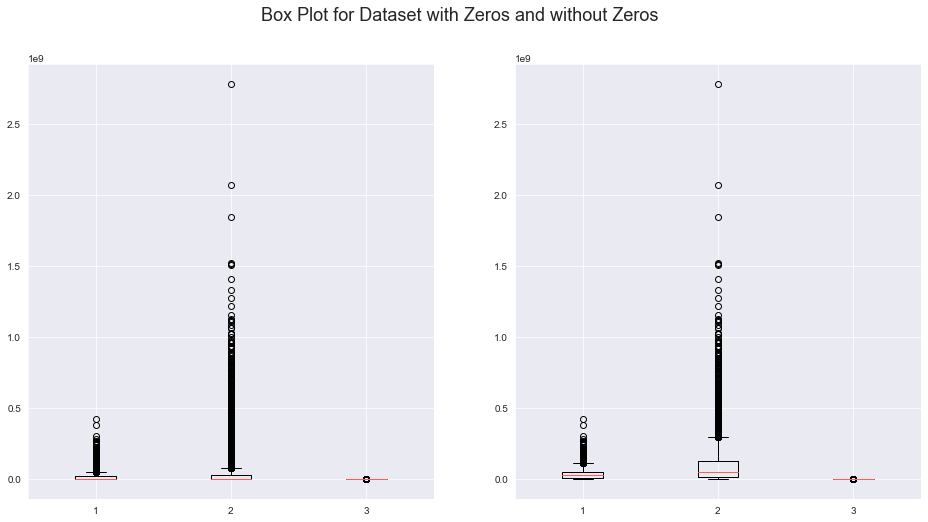

In [24]:
# Getting two axis column wise
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

ax[0].boxplot(tmdb[['budget', 'revenue', 'runtime']])
ax[1].boxplot(without_zeros[['budget', 'revenue', 'runtime']])
plt.suptitle("Box Plot for Dataset with Zeros and without Zeros", fontsize=18);

In [25]:
# removing without_zeros DF
del without_zeros

As it is clear in the above graph, the outliers remain almost similar but I lost a massive amount of data. Instead of dropping the `0`s, I will replace them with `mean` values for each column.  
  
In order to make the distribution fair, I replace zeros by the `mean` of their respective `released_year`.  
  
Before I do that, let me verify having a `0` value for `budget` column mean the `revenue` column value will also be `0` or not

In [26]:
print(tmdb[(tmdb.budget == 0) & (tmdb.revenue == 0)].shape)
print(tmdb[(tmdb.budget == 0) & (tmdb.revenue != 0)].shape)

(3806, 13)
(945, 13)


From the above code it's clear that in most cases when the `budget` is `0` the `revenue` will also be `0`.  
  
However, having a `0` value for `revenue` column when the `budget` wasn't `0` doesn't make any sense. If the move doesn't earn anything means, it's in debt of it's budget I suppose. So, I will drop them but I still keep on replacing `0` by the mean for `budget` column for the rows having any `revenue` value.

<a id="replace_zero"></a>
### Replacing Zero Values

Let me first replace the values for `budget`, `revenue`, and `runtime` before dropping the rest.  
  
**NOTE**:
- For `revenue` column filling the whole `0` values with `mean` doesn't make any sense.
- What if the movie actually doesn't generate any `revenue`?
- For this reason I only fill the `revenue` columns having `0` value for the `budget` column as well.

In [27]:
# A function to replace `0` values
def replace_zeros(row: pd.DataFrame, columns: list, data_frame: pd.DataFrame):
    """Replace zeros with the corresponding values

    Args:
        row (pd.Series): A row or data point
        columns (list): A column or columns to replace their value
        data_frame (pd.DataFrame): A data frame which hold a value to replace zero
    """
    if (row[columns] == 0).all():
        row[columns] = data_frame.loc[row.release_year, columns]
        
    return row

Calculating the mean values for each year

In [28]:
years_mean = tmdb.groupby('release_year')[['budget', 'revenue', 'runtime']].mean()
years_mean.head(5)

,budget,revenue,runtime
release_year,,,
1960,6.892796e+05,4.531406e+06,110.656250
1961,1.537900e+06,1.125734e+07,119.866667
1962,1.824071e+06,7.185995e+06,125.833333
1963,2.156809e+06,5.511911e+06,111.323529
1964,9.630039e+05,8.316629e+06,111.195122


Before performing any operations, let me subset the dataset to fasten the processing.

In [29]:
missing_budget_revenue = tmdb[(tmdb.budget == 0) & (tmdb.revenue == 0)]

Replacing the Zeros

In [30]:
missing_budget_revenue = missing_budget_revenue.apply(
    lambda x: replace_zeros(x, ['budget', 'revenue'], years_mean),
    axis=1)

tmdb[tmdb.index.isin(missing_budget_revenue.index)] = missing_budget_revenue

# Other mechanism
# tmdb = tmdb.apply(lambda x: replace_zeros(x, ['budget', 'revenue'], year_mean), axis=1).head()

In [31]:
# Checking if the operation worked as intended
print(tmdb[(tmdb.budget == 0) & (tmdb.revenue == 0)].shape)

# Free up memory
del missing_budget_revenue

(0, 13)


Let me address the `budget` and `runtime` column

In [32]:
# Filtering
missing_runtime = tmdb[tmdb.runtime == 0]
missing_budget = tmdb[tmdb.budget == 0]

# Replacing zeros
missing_runtime = missing_runtime.apply(lambda x: replace_zeros(x, ['runtime'], years_mean), axis=1)
missing_budget = missing_budget.apply(lambda x: replace_zeros(x, ['budget'], years_mean), axis=1)

# replacement
tmdb[tmdb.index.isin(missing_runtime.index)] = missing_runtime
tmdb[tmdb.index.isin(missing_budget.index)] = missing_budget

# Free up memory space
del missing_budget, missing_runtime

Checking if the `budget` and `runtime` columns still have `0` values.

In [33]:
print(tmdb[tmdb.runtime == 0].shape)
print(tmdb[tmdb.budget == 0].shape)

(0, 13)
(0, 13)


I still have the remaining `0`s in `revenue` column so let me drop them

<a id="drop_zero"></a>
### Dropping Zero Revenue Values

In [34]:
# Check up; how many elements I have before dropping
print(tmdb.shape)

# Dropping
tmdb.drop(tmdb[tmdb.revenue == 0].index, inplace=True)

# Final size
print(tmdb.shape)

(9772, 13)
(8556, 13)


Checking the description once again to see everything worked as intended

In [35]:
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8556.000000,8.556000e+03,8.556000e+03,8556.000000,8556.000000,8556.000000,8556.000000
mean,0.733387,2.508357e+07,6.951224e+07,103.224297,0.000264,6.008555,2000.883824
std,1.095286,3.082744e+07,1.243297e+08,27.562515,0.000639,0.896003,12.994818
min,0.000188,1.000000e+00,2.000000e+00,3.000000,0.000010,1.500000,1960.000000
25%,0.237060,1.033505e+07,1.916562e+07,91.000000,0.000019,5.500000,1994.000000
50%,0.435536,1.700000e+07,4.356401e+07,100.000000,0.000050,6.100000,2005.000000
75%,0.833576,2.500000e+07,5.667039e+07,113.000000,0.000198,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,0.009767,8.700000,2015.000000


Finally, I have no zero values. So, let me proceed to Answering Questions

<a id="answer_question"></a>
## Answering Questions

Before I start answering questions, let me compute the net profit of all movies and store it in `net_profit` column.  

In [36]:
tmdb['profit'] = tmdb.revenue - tmdb.budget
tmdb.profit.head()

id
135397    1.363529e+09
76341     2.284364e+08
262500    1.852382e+08
140607    1.868178e+09
168259    1.316249e+09
Name: profit, dtype: float64

Again before starting to answer the questions, let me filter out the successful and flopped movies and build DataFrame for each,
- Successful movies are the ones having a `profit` value that belong to 75 and above percentile of the `profit` column.
- Flopped movies are the ones having a `profit` value that is less than 25 percentile of the `profit` column.

In [37]:
tmdb.profit.describe()

count    8.556000e+03
mean     4.442867e+07
std      1.046486e+08
min     -4.139124e+08
25%      5.939216e+06
50%      2.626803e+07
75%      3.435121e+07
max      2.544506e+09
Name: profit, dtype: float64

In [38]:
# Filtering out the Successful and Flopped Movies
successful = tmdb[tmdb.profit >= 3.435121e+07]
flopped = tmdb[tmdb.profit <= 5.939216e+06]

successful.shape, flopped.shape

((2399, 14), (2139, 14))

<a id="popularity_question"></a>
### Popularity Related Questions

In this section, I will try to answer each of the questions fall under `Popularity` column  

Let me first visualize the `popularity` histogram before anything.

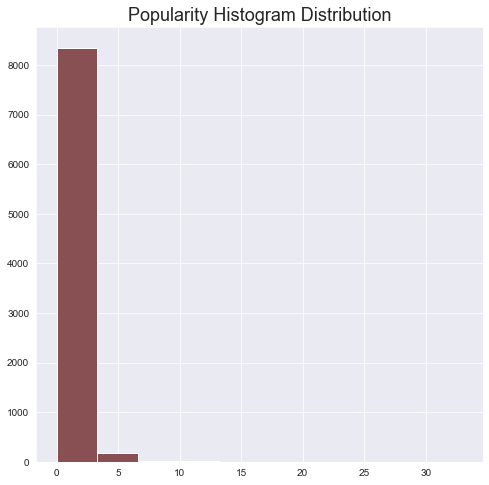

In [39]:
tmdb.popularity.hist(figsize=(8, 8))
plt.title("Popularity Histogram Distribution", fontsize=18);

Almost 90% of the movies aren't popular; only few are popular. With this information, let me start answering the questions.

#### Q#1: Does the top 15 most popular movies belong to the top 15 commercially successful movies?

- What is their ratio to the total profit?
- What is their rank in terms of `profit`  
  
This question address the correlation between popularity and being successful. Does the more popular them movie become the more profit it will generate?

In [40]:
# Filtering the top 15 most popular movies
top_popular = tmdb.sort_values('popularity', axis=0, ascending=False).head(15)

# Filtering the top 15 successful movies
top_successful = successful.sort_values('profit', axis=0, ascending=False).head(15)

# What are the top 15 popular movies
top_popular[['original_title', 'popularity', 'release_date', 'profit']].style.hide(axis='index')

original_title,popularity,release_date,profit
Jurassic World,32.985763,2015-06-09 00:00:00,1363528810.000000
Mad Max: Fury Road,28.419936,2015-05-13 00:00:00,228436354.000000
Interstellar,24.949134,2014-11-05 00:00:00,456752480.000000
Guardians of the Galaxy,14.311205,2014-07-30 00:00:00,603312399.000000
Insurgent,13.112507,2015-03-18 00:00:00,185238201.000000
Captain America: The Winter Soldier,12.971027,2014-03-20 00:00:00,544766572.000000
Star Wars,12.037933,1977-03-20 00:00:00,764398007.000000
John Wick,11.422751,2014-10-22 00:00:00,58739897.000000
Star Wars: The Force Awakens,11.173104,2015-12-15 00:00:00,1868178225.000000
The Hunger Games: Mockingjay - Part 1,10.739009,2014-11-18 00:00:00,627100229.000000


In [41]:
# Calculating how much percent of popular movies belong to successful movies
top_popular.index.isin(top_successful.index).sum() / top_popular.shape[0] * 100

26.666666666666668

From the above output, I can conclude that the movies popularity don't signify it's commercial success because only 26% of popular movies made it to commercial success.  
  
Let's visualize what their total profit contribute to the overall profit.

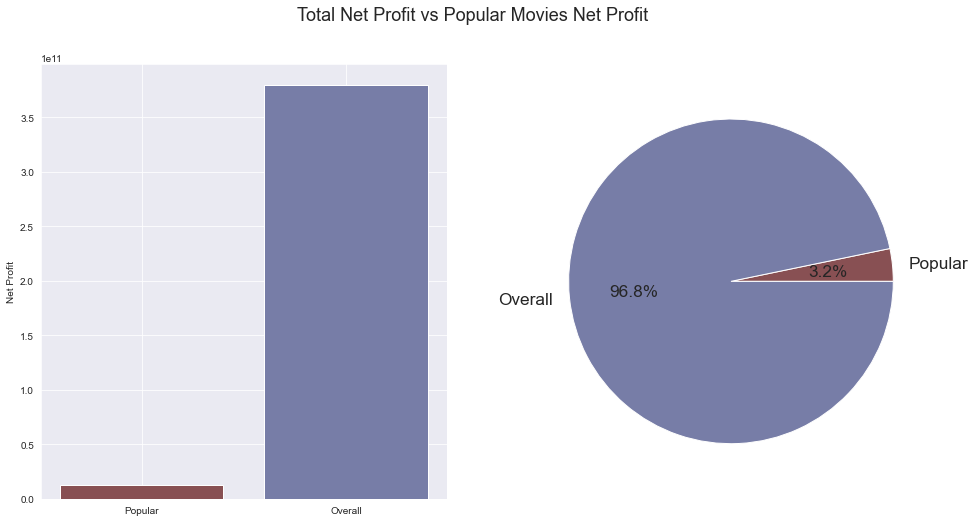

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Calculating popular movies profit sum
popular_total_profit = top_popular.profit.sum()
overall_profit = tmdb.profit.sum()

# Let's plot the bar chart
ax[0].bar([1, 2], [popular_total_profit, overall_profit], color=['#885053', '#777DA7'])
ax[0].set_ylabel('Net Profit')
ax[0].set_xticks([1, 2], ['Popular', 'Overall'])

# Let's plot pie chart
ax[1].pie(
    [popular_total_profit, overall_profit - popular_total_profit],
    labels=['Popular', 'Overall'],
    colors=['#885053', '#777DA7'], autopct='%.1f%%',
    textprops={'size': 'xx-large'})

plt.suptitle("Total Net Profit vs Popular Movies Net Profit", fontsize=18);

Finding their `profit` rank

In [43]:
# Giving rank for every data point in the dataset
profit_rank = tmdb.profit.rank(method='dense', ascending=False).astype(int)

# Filtering out only the top_popular ones and assign their respective value
top_popular = top_popular.assign(profit_rank=lambda x: profit_rank[x.index])

top_popular[['original_title', 'popularity', 'release_date', 'profit', 'profit_rank']].style.hide(axis='index')

original_title,popularity,release_date,profit,profit_rank
Jurassic World,32.985763,2015-06-09 00:00:00,1363528810.000000,4
Mad Max: Fury Road,28.419936,2015-05-13 00:00:00,228436354.000000,338
Interstellar,24.949134,2014-11-05 00:00:00,456752480.000000,115
Guardians of the Galaxy,14.311205,2014-07-30 00:00:00,603312399.000000,65
Insurgent,13.112507,2015-03-18 00:00:00,185238201.000000,429
Captain America: The Winter Soldier,12.971027,2014-03-20 00:00:00,544766572.000000,81
Star Wars,12.037933,1977-03-20 00:00:00,764398007.000000,35
John Wick,11.422751,2014-10-22 00:00:00,58739897.000000,1258
Star Wars: The Force Awakens,11.173104,2015-12-15 00:00:00,1868178225.000000,2
The Hunger Games: Mockingjay - Part 1,10.739009,2014-11-18 00:00:00,627100229.000000,61


Visualizing `top_popular` movies `profit_rank`

<Figure size 432x288 with 0 Axes>

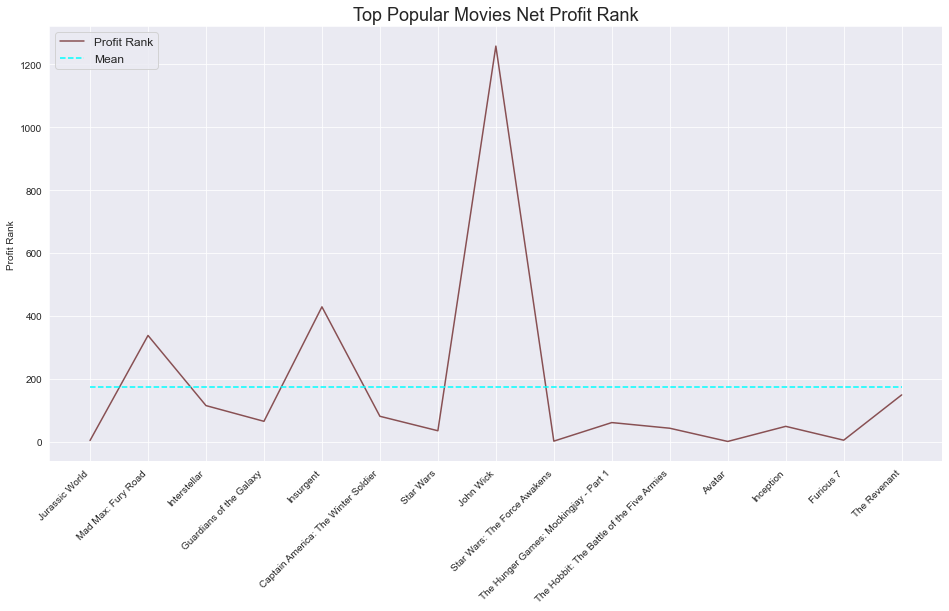

In [44]:
plot_graph(top_popular, "profit_rank", "Top Popular Movies Net Profit Rank", "Profit Rank", inc_mean=True)

#### Q#2: Which movies are commercially successful but not popular?

This question is about filtering out the top 15 movies those made to the commercial success category but not to popularity.  
   
To answer this question, I need to filter out the popular movies by taking 75% and above popularity percentile just like I did for `net_profit` column.

In [45]:
# getting the cutting point
tmdb.popularity.describe()

count    8556.000000
mean        0.733387
std         1.095286
min         0.000188
25%         0.237060
50%         0.435536
75%         0.833576
max        32.985763
Name: popularity, dtype: float64

In [46]:
# Filtering popular movies
popular = tmdb[tmdb.popularity >= 0.833576]

In [47]:
# Filter out the unpopular but successful movies
unpopular_successful = successful[~successful.index.isin(popular.index)]

# Filtering the top 15
top_unpopular_successful = unpopular_successful.sort_values('profit', ascending=False, axis=0).head(15)

# Assigning their profit rank
top_unpopular_successful = top_unpopular_successful.assign(profit_rank=lambda x: profit_rank[x.index])

top_unpopular_successful[['original_title', 'popularity', 'release_date', 'profit', 'profit_rank']].style.hide(axis='index')

original_title,popularity,release_date,profit,profit_rank
Transformers: Dark of the Moon,0.760503,2011-06-28 00:00:00,928746996.000000,14
Transformers: Revenge of the Fallen,0.813323,2009-06-19 00:00:00,686297228.000000,45
Fast & Furious 6,0.522347,2013-05-06 00:00:00,628679850.000000,60
The Passion of the Christ,0.672946,2004-02-25 00:00:00,581899420.000000,72
Fast Five,0.436803,2011-04-20 00:00:00,501137675.000000,95
Home Alone,0.142486,1990-11-09 00:00:00,458684675.000000,113
The Bodyguard,0.740663,1992-11-25 00:00:00,386006740.000000,157
Sex and the City,0.620489,2008-05-12 00:00:00,350252786.000000,178
Crocodile Dundee,0.680643,1986-09-26 00:00:00,323203506.000000,203
The Wolverine,0.734349,2013-07-23 00:00:00,295440673.000000,229


Visualizing `profit_rank` of unpopular but successful movies

<Figure size 432x288 with 0 Axes>

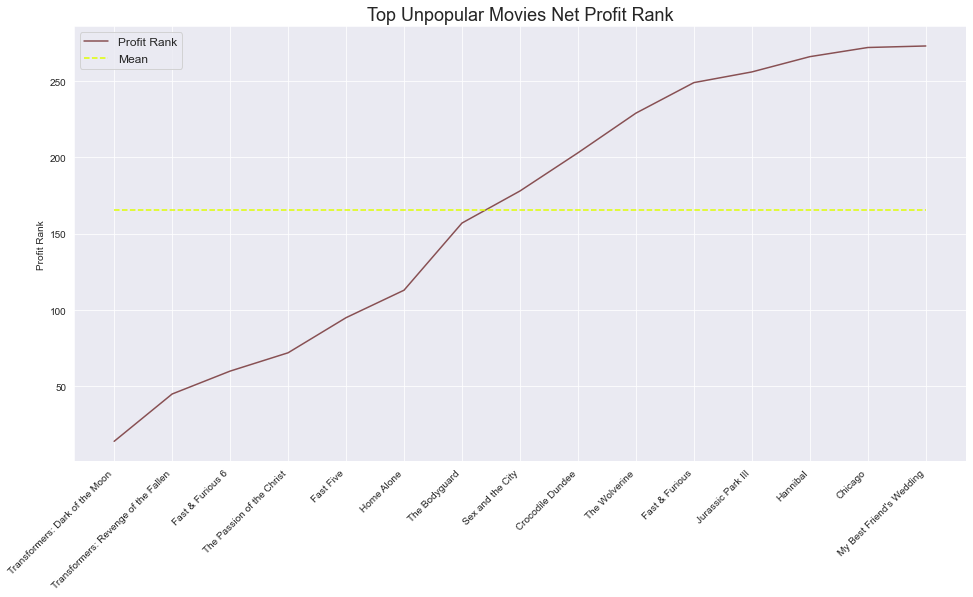

In [48]:
plot_graph(top_unpopular_successful, "profit_rank", "Top Unpopular Movies Net Profit Rank", "Profit Rank", inc_mean=True)

#### Q#3: Which movies have the highest `popularity` vs `vote_count` ratio?

What are the top 15 movies with high `vote_count` to `popularity` ratio?

In [49]:
# Calculating the ratio in 100%
ratio_rank = tmdb.assign(popularity_count_ratio=lambda x: round(x.vote_count / x.popularity * 100, 2)) \
            .sort_values('popularity_count_ratio', ascending=False, axis=0).head(20)

# Rounding the ratio value and adding a % symbol at the end
# ratio_rank.popularity_count_ratio = ratio_rank.popularity_count_ratio.apply(lambda x: f"{}%")

ratio_rank[['original_title', 'popularity', 'vote_count', 'popularity_count_ratio']].style.hide(axis='index')

original_title,popularity,vote_count,popularity_count_ratio
G.B.F.,0.000620,0.000082,13.230000
The Hospital,0.000188,0.000010,5.320000
The Internship,0.040858,0.001174,2.870000
X-Men: First Class,0.164515,0.003651,2.220000
X-Men,0.182246,0.002766,1.520000
X-Men: The Last Stand,0.157586,0.002381,1.510000
Mon petit doigt m'a dit...,0.000973,0.000013,1.340000
X2,0.175002,0.002222,1.270000
The Invisible War,0.001372,0.000017,1.240000
The Central Park Five,0.001783,0.000022,1.230000


<a id="director_question"></a>
### Director related Questions

Let me try to address the Director related questions.  
  
Since the `director` column is a multiple value column separated by `|`, I need to take care of it before I start answering the questions.

In [50]:
# Checking the size before expansion
tmdb.shape

(8556, 14)

In [51]:
# Exploding the director multi-valued columns
director_df = expand_multivalue_columns(tmdb, 'director')

In [52]:
# Checking the shape of newly created data frame.
director_df.shape

(9405, 14)

The newly formed data from has `9405` rows, i.e., the data grew from `8556` to `9405`. With that information, let me answer the questions.

#### Q#1: Who is the most popular Director?
- How many movies he/she directed?
- What are his/her top 5 commercially successful and flopped movies?

Finding out who is the most popular director.

In [53]:
# Grouping by director, then taking the mean of `popularity` column, then take the max values index
popular_director = director_df.groupby('director')['popularity'].mean().idxmax()
popular_director

'Colin Trevorrow'

`Colin Trevorrow` is the most popular director. What about the movies he directed?

In [54]:
# Filtering Colin Movies
colin_movies = director_df[director_df['director'] == 'Colin Trevorrow']
colin_movies[['original_title', 'popularity', 'director', 'runtime', 'release_date', 'profit']].style.hide(axis='index')

original_title,popularity,director,runtime,release_date,profit
Jurassic World,32.985763,Colin Trevorrow,124.000000,2015-06-09 00:00:00,1363528810.000000
Safety Not Guaranteed,0.408010,Colin Trevorrow,85.000000,2012-06-08 00:00:00,3257792.000000


Since `Colin Trevorrow` directed only 2 movies, let me just check weather they both are successful or not.

In [55]:
colin_movies.index.isin(successful.index)

array([ True, False])

From the above output, it's is clear that only `Jurassic World` is the successful movie directed by `Colin Trevorrow`.

#### Q#2: Who is the Director with maximum number of Movies Directed?
- How many movies he/she directed?
- What are his/her top commercially successful and flopped movies?
- What year was his/her most popular movie released?
- How many years it takes him/her to direct all the movies?

In [56]:
# Getting the number of movies a director directed
director_movies_count = director_df.groupby('director')['original_title'].agg('count')

# Getting the director with a maximum movies
highest_director = director_movies_count.idxmax()
highest_director

'Woody Allen'

Next up, let me find out how many movies `Woody Allen` directed?

In [57]:
# Filtering the movies directed by `Woody Allen`
woody_allen_movies = director_df[director_df.director == highest_director]

# Getting the number of movies
woody_allen_movies.shape[0]

35

Wohhhhhh 😲! `35` Movies were directed by `Woody Allen`. Now, let me find out what are his top 5 flopped and succeeded movies.

In [58]:
# Filtering the successful ones
woody_allen_successful = successful[successful.index.isin(woody_allen_movies.index)]

# Filtering the flopped ones
woody_allen_flopped = flopped[flopped.index.isin(woody_allen_movies)]

# Checking the shape
woody_allen_successful.shape, woody_allen_flopped.shape

((9, 14), (0, 14))

Woody Allen never directed a flopped movies rather he directed 9 top successful movies out of 35.  
  
Let me check what their profit looks like in a graph.

<Figure size 432x288 with 0 Axes>

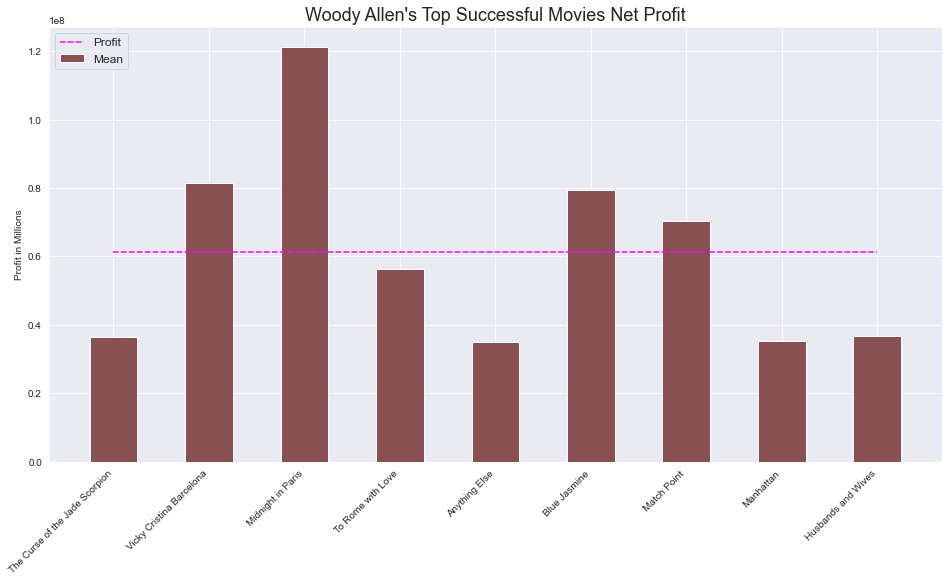

In [59]:
plot_graph(woody_allen_successful, 'profit', "Woody Allen's Top Successful Movies Net Profit", "Profit in Millions", inc_mean=True, graph_type="bar", width=0.5)

Time to answer on what year his most successful movies released.

In [60]:
woody_allen_successful[
    woody_allen_successful.profit == woody_allen_successful.profit.max()
][['original_title', 'release_date', 'profit']].style.hide(axis='index')

original_title,release_date,profit
Midnight in Paris,2011-05-11 00:00:00,121119219.000000


Calculating the years it took `Woody Allen` to direct `35` movies

In [61]:
# Sorting `Woody Allen` movies
woody_allen_movies = woody_allen_movies.sort_values('release_year', ascending=True);

# Finding the range
print(f"First movie got released in: {woody_allen_movies.iloc[0].release_year}")
print(f"Last movie got released in: {woody_allen_movies.iloc[-1].release_year}")
print(f"It took Woody Allen \
{woody_allen_movies.iloc[-1].release_year - woody_allen_movies.iloc[0].release_year} \
years to direct 35 Movies.")

First movie got released in: 1966
Last movie got released in: 2015
It took Woody Allen 49 years to direct 35 Movies.


#### Q#3: Who are the top directors those hold the position 2 - 16?
- How many movies each of them directed?

Let me sort the `director_count` series I defined earlier to find out the rest directors and visualize their number of movies in a graph.

<Figure size 432x288 with 0 Axes>

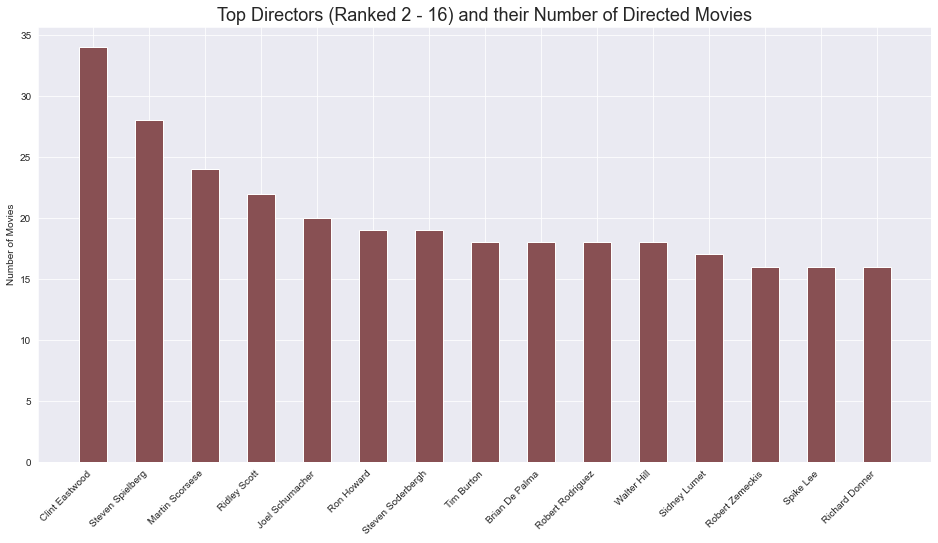

In [62]:
# Sorting and slicing
top_directors = director_movies_count.sort_values(ascending=False)[1:16]

plot_graph(top_directors.reset_index(), "original_title", "Top Directors (Ranked 2 - 16) and their Number of Directed Movies", "Number of Movies", xticks="director", graph_type="bar", width=0.5)

<a id="runtime_question"></a>
### Runtime Related Questions

Before I start answering the question, let me just take a look at the histogram distribution of `runtime` column

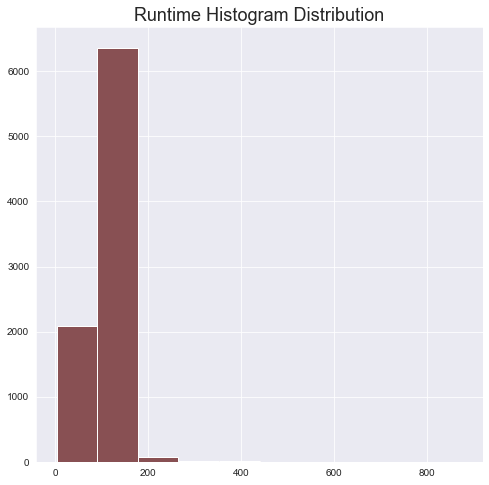

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
tmdb.runtime.hist()
plt.title("Runtime Histogram Distribution", fontsize=18);

Most of them are between 100 and 200 but there are still out liners in both sides. With this information in hand, I will try to answer the questions under.   
  
To answer the questions, I will use the Data Frames defined in the above sections.

#### Q#1: What is the average runtime for successful movies and flopped ones?

In [64]:
# finding the mean for both successful and flopped movies
successful.runtime.mean(), flopped.runtime.mean()

(108.02339535140837, 104.5614773258532)

The mean of flopped movies is around 3 min smaller than those of successful ones.

#### Q#2: What are runtime's top 5 profit values as compared to same runtime movies?

To answer this question, I will only consider a runtime within a range of `110 - 125` mins for two reasons:
1. To limit the number of runtimes since the runtime column has `220` unique values
2. The range is `7 min` higher and lower than of the mean which is ideal to sample highly condensed area. 

In [65]:
# Finding the mean
tmdb.runtime.describe()

count    8556.000000
mean      103.224297
std        27.562515
min         3.000000
25%        91.000000
50%       100.000000
75%       113.000000
max       877.000000
Name: runtime, dtype: float64

In [66]:
# Getting the mean
runtime_mean = int(tmdb.runtime.mean())  # 103

# Filtering the dataset within the specified runtime range
runtime_filtered = tmdb[tmdb.runtime.isin(range(runtime_mean - 7, runtime_mean + 8))]

# Checking the number of movies per runtime 
runtime_filtered.groupby('runtime').runtime.agg('count')

runtime
96.0     236
97.0     244
98.0     214
99.0     190
100.0    261
101.0    192
102.0    194
103.0    172
104.0    176
105.0    209
106.0    172
107.0    162
108.0    181
109.0    119
110.0    166
Name: runtime, dtype: int64

In [67]:
# Picking the top 5 profit values from runtime group
runtime_filtered = runtime_filtered.groupby('runtime').profit.nlargest(5)

# Sorting filtered values
runtime_filtered = runtime_filtered.reset_index().sort_values(['runtime', 'profit'], ascending=[True, False])

# Assigning rank for each profit value
runtime_filtered['rank'] = runtime_filtered.groupby('runtime').profit.rank(method='dense', ascending=False).astype(int)

Since the `runtime_filtered` data frame is long data frame, it is hard to plot a graph. One runtime has five different values.  
  
The long data frame must be converted to a wide one, the ranks became the columns and profit values will became the values.

In [68]:
# Expanding long Data Frame to wide
runtime_filtered = runtime_filtered.pivot_table(index='runtime', columns="rank", values="profit")

Visualization

<Figure size 432x288 with 0 Axes>

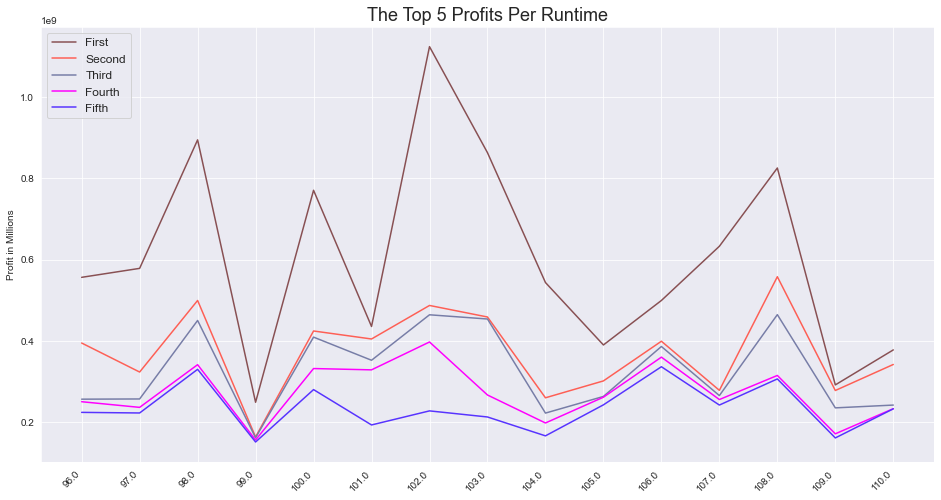

In [69]:
plot_graph(runtime_filtered.reset_index(), list(range(1, 6)), "The Top 5 Profits Per Runtime", "Profit in Millions", xticks="runtime", legend=["First", "Second", "Third", "Fourth", "Fifth"])

#### Q#3: Which runtime got high average vote rate?

The answer to this question isn't that complicated. Grouping the data frame by runtime the calculate the mean `vote_average` and get the maximum will be enough.

In [70]:
# Getting the mean `vote_average`
runtime_vote_mean = tmdb.groupby('runtime').vote_average.mean()

# Getting the max `vote_average`
max_vote_average = runtime_vote_mean.max()

# Getting the runtimes with maximum `vote_average`
runtime_vote_mean[runtime_vote_mean == max_vote_average]

runtime
235.0    8.3
566.0    8.3
Name: vote_average, dtype: float64

`235` and `566` runtimes got a high `vote_average` value of `8.3`

#### Q#4: Average runtime of movies each year?

I already have an answer for this question from the above sections. So, let's just visualize it.

<Figure size 432x288 with 0 Axes>

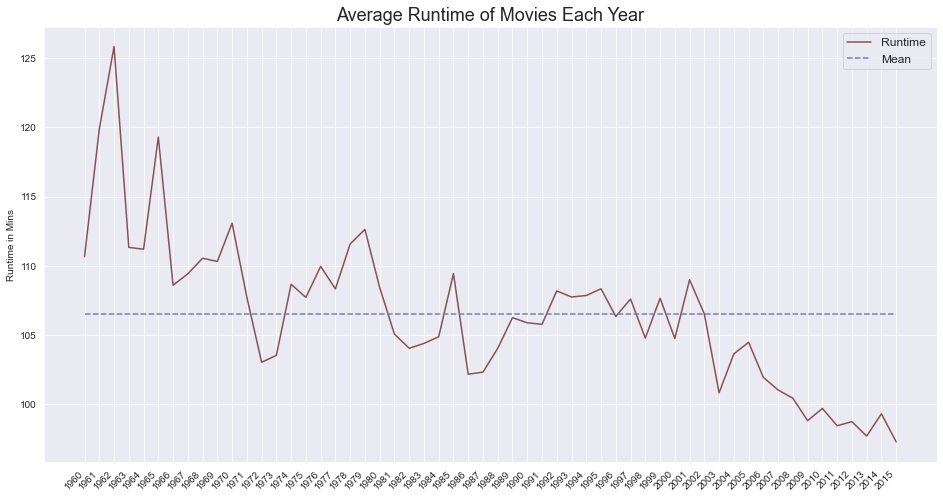

In [71]:
plot_graph(years_mean.reset_index(), "runtime", "Average Runtime of Movies Each Year", "Runtime in Mins", xticks="release_year", inc_mean=True, legend_loc="upper right")

The average runtime used to be high at first but it started to fall down through times

<a id="genre_questions"></a>
### Genre Related Questions

I need to preprocess the `genre` column before I start to answer the questions just like I did for the `director` column.

In [72]:
# Printing the size of the dataset
print(tmdb.shape)

# Expanding the genre column
genre_df = expand_multivalue_columns(tmdb, 'genres')

# Checking the shape of newly created data frame.
genre_df.shape

(8556, 14)


(21575, 14)

The dataset grew from `8556` to `21,575`

In [73]:
# checking the unique values of genres
genre_df.genres.unique(), genre_df.genres.nunique()

(array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
        'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
        'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
        'Documentary', 'TV Movie', 'Foreign'], dtype=object),
 20)

#### Q#1: Which genres are most popular?

I am going to answer this question through visualization. I will draw a graph for all genres starting from higher popularity to lowest one.

In [74]:
# Group by genre
genre_grouped = genre_df.groupby('genres')

# Calculating the mean and sorting
genre_popularity = genre_grouped.popularity.mean().reset_index().sort_values('popularity', ascending=False)

<Figure size 432x288 with 0 Axes>

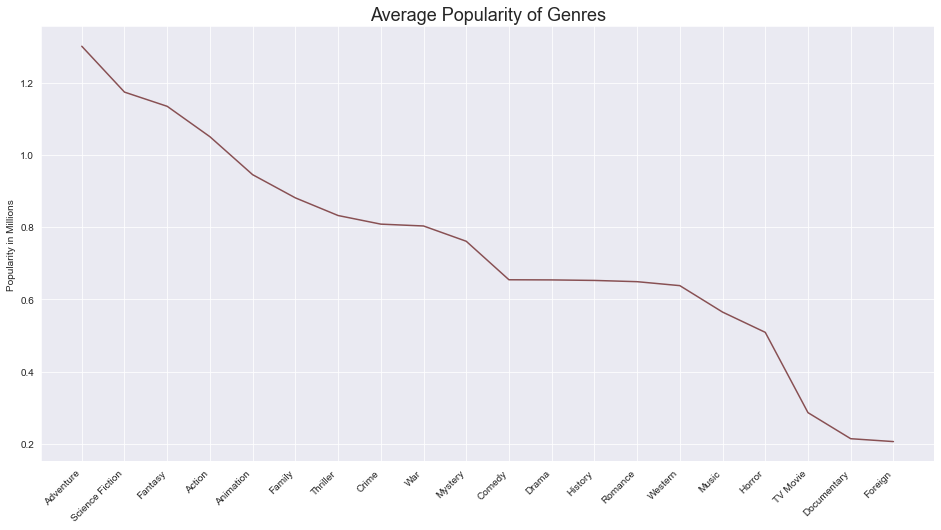

In [75]:
# Visualizing the graph
plot_graph(genre_popularity, "popularity", "Average Popularity of Genres", "Popularity in Millions", xticks="genres")

#### Q#2: Which genres are more successful and flopped?
- What is the percent of successful and flopped movies

For this question, I will try to answer from success and flop proportion.

In [76]:
# Getting the number of successful movies per genre
genre_success_count = genre_df[genre_df.index.isin(successful.index)].groupby('genres').size()

# Getting the number of flopped movies per genre
genre_flop_count = genre_df[genre_df.index.isin(flopped.index)].groupby('genres').size()

# Getting the number of total movies per genre
genre_movie_count = genre_grouped.size()

# Calculating the Success ratio
genre_success_ratio = genre_success_count / genre_movie_count

# Calculating the Flop ratio
genre_flop_ratio = genre_flop_count / genre_movie_count

# replace the NaN values if there is any
genre_success_ratio.fillna(0, inplace=True)
genre_flop_ratio.fillna(0, inplace=True)

Drawing the graph

<Figure size 432x288 with 0 Axes>

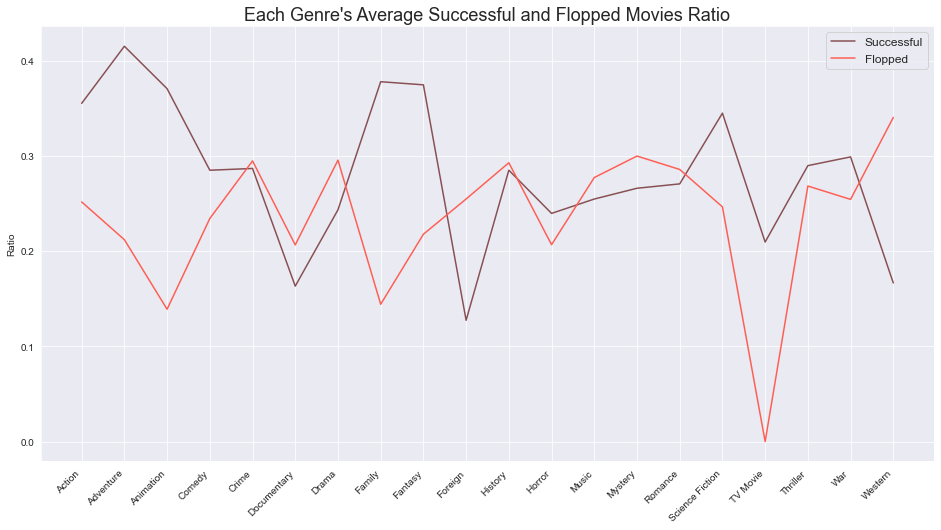

In [77]:
plot_graph(
    pd.DataFrame({'success': genre_success_ratio, 'flop': genre_flop_ratio, 'ticks': genre_flop_ratio.index}),
    ['success', 'flop'], "Each Genre's Average Successful and Flopped Movies Ratio", "Ratio",
    legend=["Successful", "Flopped"], legend_loc="upper right", xticks='ticks'
)

#### Q#3: What is genre's vote average?

This question doesn't have that much of the difference from the questions I've already answered. But, I will answer it through visualization.

<Figure size 432x288 with 0 Axes>

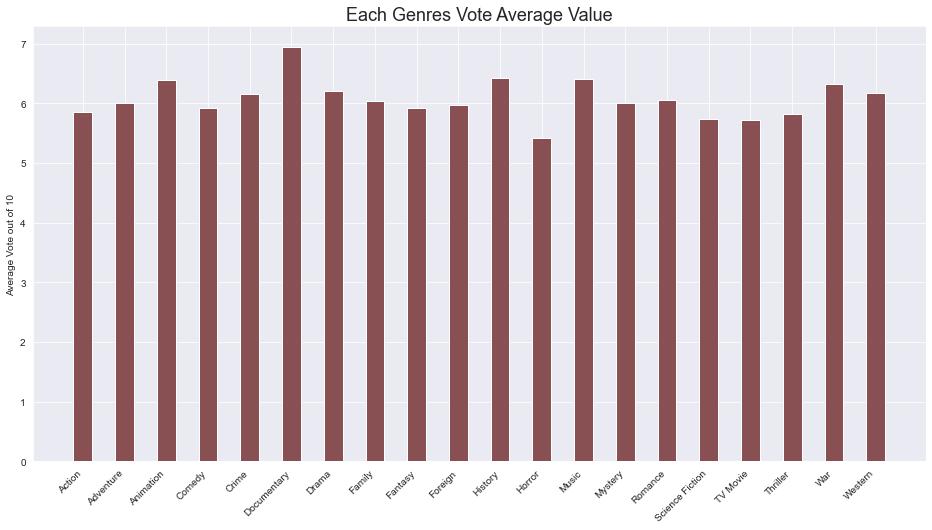

In [78]:
# Finding the mean value
genre_vote_average = genre_grouped.vote_average.mean()

# Visualizing the graph
plot_graph(
    genre_vote_average.reset_index(),
    "vote_average", "Each Genres Vote Average Value", "Average Vote out of 10",
    graph_type="bar", xticks='genres', width=0.45
)

#### Q#4: What genre is popular each year?

To answer this question, I will group the data set using both `release_year` and `genres` column. Then calculating the mean and taking the max of each year is a piece of cake.

In [79]:
# Grouping and finding the mean for popularity
genre_year_grouped = genre_df.groupby(['release_year', 'genres'])

# Calculating the mean of `popularity`
genre_year_popularity = genre_year_grouped.popularity.mean()

# Getting the genre with maximum average popularity for each year
genre_year_max_mean = genre_year_popularity[genre_year_popularity.groupby(level=0).idxmax()]

Visualizing the result

<Figure size 432x288 with 0 Axes>

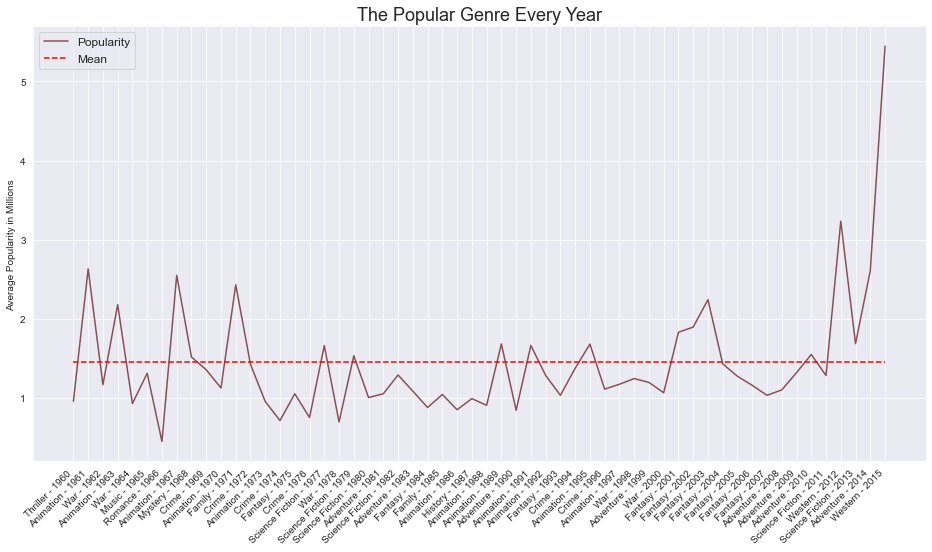

In [80]:
x_labels = [f"{x[1]} - {x[0]}" for x in list(genre_year_max_mean.index)]

# Plotting the graph
plot_graph(
    pd.DataFrame({"labels": x_labels, "popularity": genre_year_max_mean.reset_index()['popularity']}),
    "popularity", "The Popular Genre Every Year",
    "Average Popularity in Millions", xticks="labels", inc_mean=True)

#### Q#5: How many movies released under the same genre category each year?

To answer the question it's so simple but to visualize it seems a bit tricky.  
  
`20` different type of `genres` for `56` year points is a bit cluttered. So, reshape the long data frame to a wide one.

In [81]:
# Getting the year, genre movie count
movie_genre_year = genre_year_grouped.size()

# resetting an index to make the conversion simple
movie_genre_year = movie_genre_year.reset_index()
movie_genre_year.columns = ['year', 'genre', 'count']

movie_genre_year.head()

,year,genre,count
0,1960,Action,8
1,1960,Adventure,4
2,1960,Comedy,7
3,1960,Crime,2
4,1960,Drama,13


From the above output, it's clear that I did nothing special. but this is a long data frame so I wanted to change it to wide one using genres as columns

In [82]:
# Converting long to wide data frame
movie_genre_year = movie_genre_year.pivot(index='year', columns='genre', values='count')

# Filling the missing value
movie_genre_year.fillna(0, inplace=True)

movie_genre_year.head(3)

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1960,8.0,4.0,0.0,7.0,2.0,0.0,13.0,3.0,1.0,1.0,5.0,5.0,1.0,0.0,5.0,1.0,0.0,4.0,2.0,6.0
1961,6.0,6.0,1.0,10.0,2.0,0.0,13.0,4.0,1.0,1.0,3.0,3.0,2.0,1.0,5.0,3.0,0.0,0.0,2.0,3.0
1962,5.0,7.0,0.0,4.0,3.0,0.0,15.0,2.0,0.0,0.0,2.0,3.0,1.0,2.0,3.0,1.0,0.0,5.0,1.0,3.0


Now I can plot a scatter plot, using the above data frame, before plotting, let's define the color palette

In [83]:
movie_genre_year.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object', name='genre')

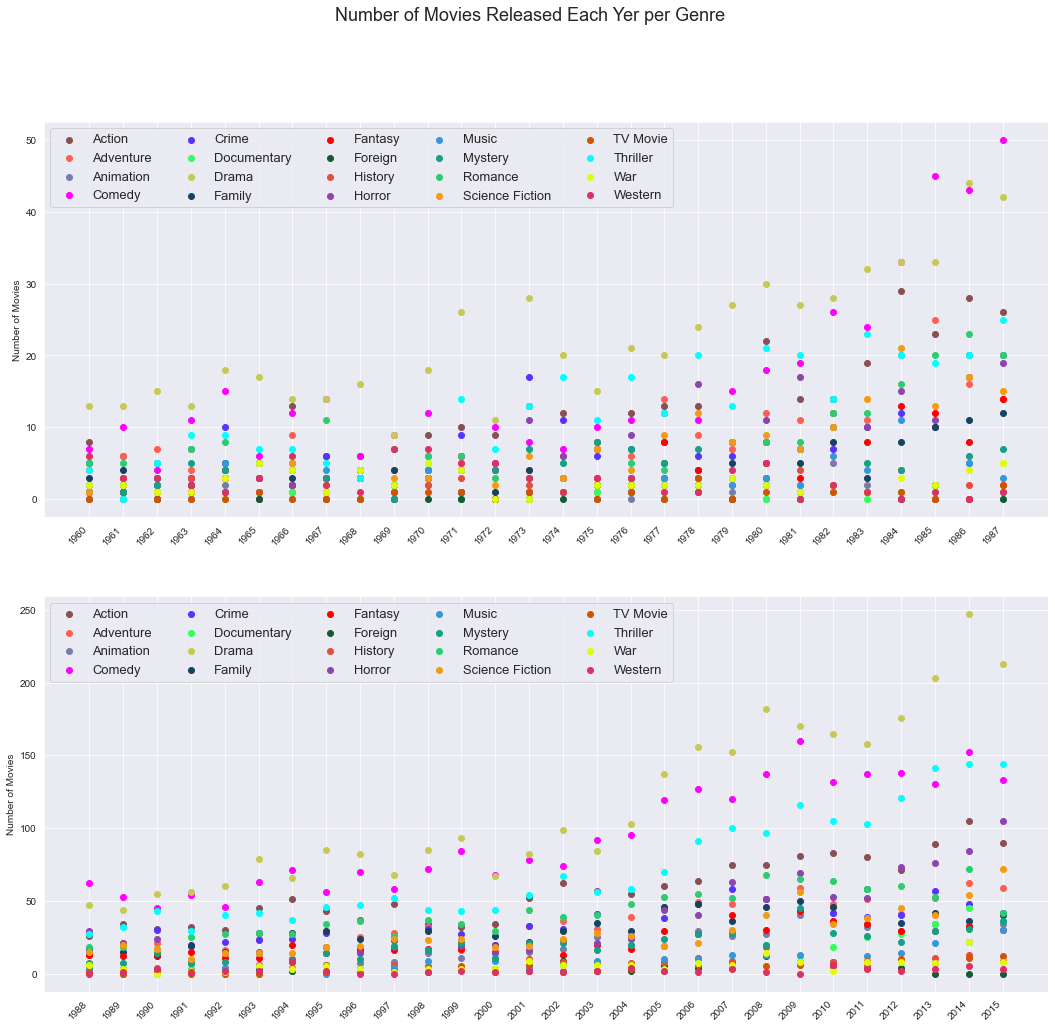

In [84]:
fig, ax = plt.subplots(nrows=2, figsize=(18, 16))
middle_year = round(len(movie_genre_year.index) / 2)

# setup
length = movie_genre_year.iloc[:middle_year].shape[0]
x_tick_points = np.linspace(1, length, length)
 
# Plotting all the graphs
for itr in range(20):
    ax[0].scatter(x_tick_points, movie_genre_year.iloc[:middle_year, itr], color=my_colors[itr])

ax[0].set_ylabel("Number of Movies")
ax[0].set_xticks(x_tick_points, movie_genre_year.index[:middle_year], rotation=45, horizontalalignment='right')
ax[0].legend(movie_genre_year.columns, loc="upper left", fontsize=13, ncol=5)


# setup
length = movie_genre_year.iloc[middle_year:].shape[0]
x_tick_points = np.linspace(1, length, length)

# Plotting all the graphs
for itr in range(20):
    ax[1].scatter(x_tick_points, movie_genre_year.iloc[middle_year:, itr], color=my_colors[itr])

ax[1].set_ylabel("Number of Movies")
ax[1].set_xticks(x_tick_points, movie_genre_year.index[middle_year:], rotation=45, horizontalalignment='right')
ax[1].legend(movie_genre_year.columns, loc="upper left", fontsize=13, ncol=5)


plt.suptitle("Number of Movies Released Each Yer per Genre", fontsize=18);

<a id="company_question"></a>  
### Production Company Related Questions

Again I need to explode the data frame before starting to process just like I did for `director` and `genre` columns

In [85]:
# Printing the size of the dataset
print(tmdb.shape)

# Expanding the production companies column
production_df = expand_multivalue_columns(tmdb, 'production_companies')

# Checking the shape of newly created data frame.
production_df.shape

(8556, 14)


(20280, 14)

The dataset grew from `8556` to `20,280`

In [86]:
# checking the unique values of production companies
production_df.production_companies.unique(), production_df.production_companies.nunique()

(array(['Universal Studios', 'Amblin Entertainment', 'Legendary Pictures',
        ..., 'Bruce Brown Films', 'Douglas & Lewis Productions',
        'Benedict Pictures Corp.'], dtype=object),
 6923)

There are `6923` unique production companies.

#### Q#1: Which production companies are most popular?

I am going to answer this question through visualization. I will draw a graph for the top 15 production companies starting from higher popularity to lowest one.

In [87]:
# Group by production_companies
production_grouped = production_df.groupby('production_companies')

# Calculating the mean and sorting
production_popularity = production_grouped.popularity.mean().reset_index().sort_values('popularity', ascending=False).head(15)

<Figure size 432x288 with 0 Axes>

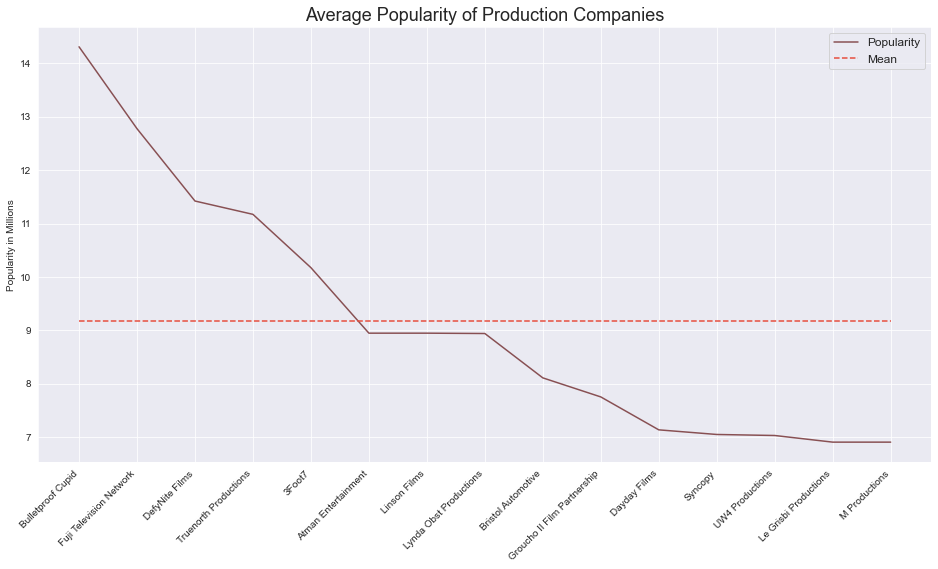

In [88]:
# Visualizing the graph
plot_graph(
    production_popularity, "popularity",
    "Average Popularity of Production Companies",
    "Popularity in Millions", xticks="production_companies", inc_mean=True, legend_loc="upper right")

#### Q#2 What are the top 15 production companies which released highest number of movies?
- What are the proportion of successful and flopped movies they released?
- What is their movie per year ratio?

In [89]:
# Count the Movies
# Find the minimum and Max values for release_year
# Sort using th movies count
top_production_companies = production_grouped \
    .agg({'original_title': 'count', 'release_year': ['min', 'max']}) \
    .sort_values(('original_title', 'count'), ascending=False).head(15)

Visualizing top production companies number of movies released.

<Figure size 432x288 with 0 Axes>

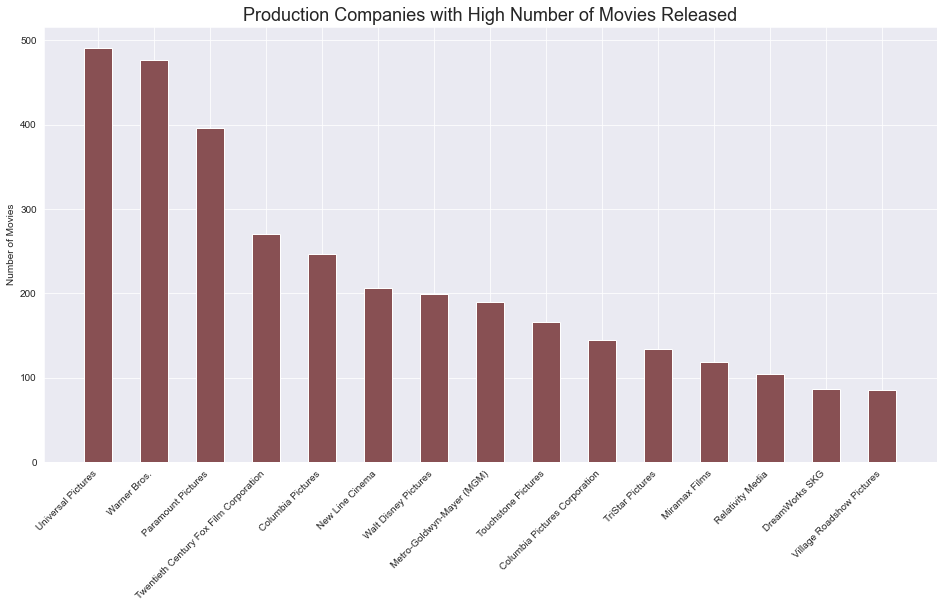

In [90]:
plot_graph(
    top_production_companies.reset_index(), ('original_title', 'count'),
    "Production Companies with High Number of Movies Released",
    "Number of Movies", graph_type="bar", xticks="production_companies", width=0.5)

Now, let me find out the proportion of their flopped and successful movies

In [91]:
# Filter the movies those produced by the top companies
top_production_movies = production_df[production_df.production_companies.isin(top_production_companies.index)]

# Filter out the successful movies and get the count for each production company
top_production_successful = top_production_movies[top_production_movies.index.isin(successful.index)].groupby('production_companies').size()

# Filter out the flopped movies and get the count for each production company
top_production_flopped = top_production_movies[top_production_movies.index.isin(flopped.index)].groupby('production_companies').size()

Re-indexing so that the indexes will be sorted based on the number of movies the production company produced.

In [92]:
top_production_successful = top_production_successful.reindex(top_production_companies.index)
top_production_flopped = top_production_flopped.reindex(top_production_companies.index)

Visualizing the proportions

<Figure size 432x288 with 0 Axes>

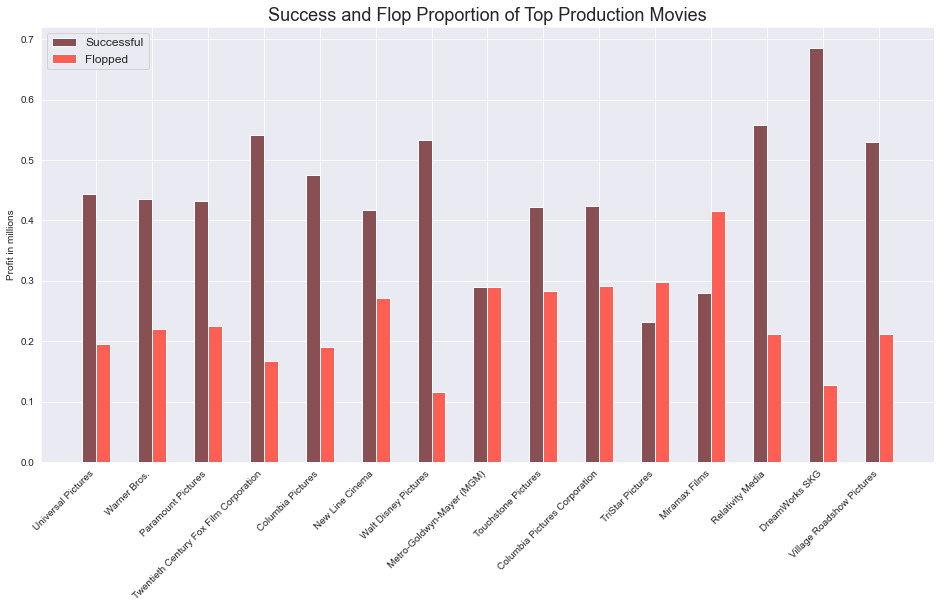

In [93]:
graph_df = pd.DataFrame({
    'success': top_production_successful / top_production_companies[('original_title', 'count')],
    'flop': top_production_flopped / top_production_companies[('original_title', 'count')],
    'ticks': top_production_companies.index
})

plot_graph(
    graph_df, ['success', 'flop'], "Success and Flop Proportion of Top Production Movies", 
    "Profit in millions", legend=["Successful", "Flopped"], graph_type="bar", width=0.25, xticks="ticks"
)

Finding the ratio of movies per year to answer the movie per year ratio question for top production companies

In [94]:
# retrieving the values from multi-index data frame and compute the ratio
movie_year_ratio = top_production_companies.apply(
    lambda x: x[('original_title', 'count')] / (x[('release_year', 'max')] - x[('release_year', 'min')]),
    axis=1)

Visualizing the movie per year ratio of top companies

<Figure size 432x288 with 0 Axes>

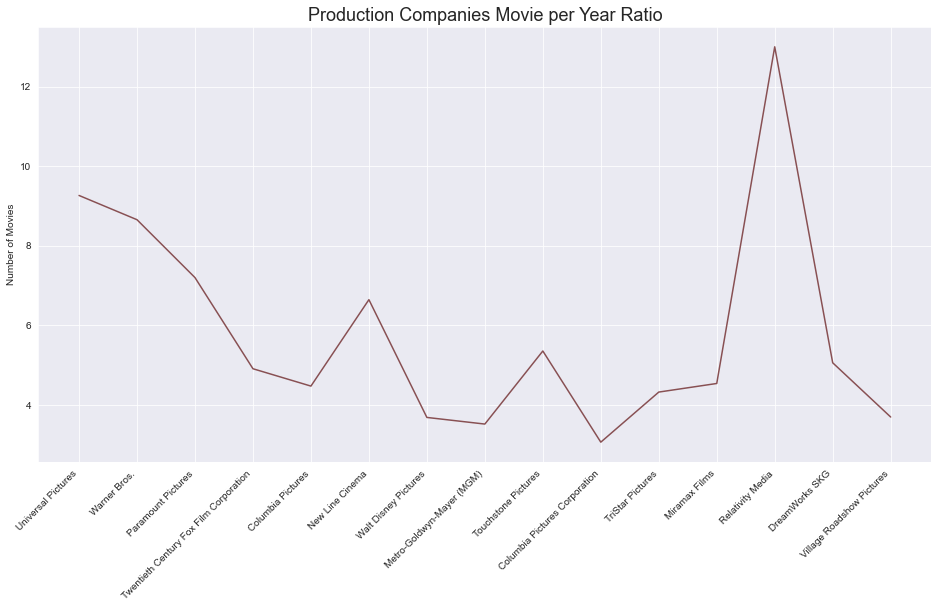

In [95]:
plot_graph(
    movie_year_ratio.reset_index(), 0,
    "Production Companies Movie per Year Ratio",
    "Number of Movies", xticks="production_companies")

<a id="cast_question"></a>
### Cast Related Questions

To answer cast related questions, the first process will be exact similar that of the `director` and `genre`. I need to expand the multi-values in to multiple rows.

In [96]:
# Printing the size of the dataset
print(tmdb.shape)

# Expanding the genre column
casts_df = expand_multivalue_columns(tmdb, 'cast')

# Checking the shape of newly created data frame.
casts_df.shape

(8556, 14)


(42005, 14)

#### Q#1: How many unique star casts found?
- How many of them participated only in successful and flopped movies?
- How many of them participated only both in successful and flopped movies?
- How many of them participated neither in successful nor flopped movies?

Calculating the number of unique star casts is so easy, using `casts_df.cast.nunique()` will do the job.

In [97]:
total_unique_casts = casts_df.cast.nunique()
f"The number of unique stars is: {total_unique_casts}"

'The number of unique stars is: 15344'

Let me filter out the successful, flopped, and neither movies from `casts_df` data frame

In [98]:
# Filtering successful movies
stars_successful = casts_df[casts_df.index.isin(successful.index)]

# Filtering flopped movies
stars_flopped = casts_df[casts_df.index.isin(flopped.index)]

# Filtering neither movies
stars_neither = casts_df[~casts_df.index.isin(successful.index.append(flopped.index))]

# checking the sizes
print(stars_successful.shape)
print(stars_flopped.shape)
print(stars_neither.shape)

(11860, 14)
(10588, 14)
(19557, 14)


Now let me find the number of unique stars for each data frames above  
  
The rules are simple:
1. Concatenet the other two data frames
2. Exclude the intersection
3. Get the number of unique casts

In [99]:
unique_stars_in_successful = stars_successful[~stars_successful.cast.isin(pd.concat([stars_flopped.cast, stars_neither.cast]))].cast.nunique()
unique_stars_in_flopped = stars_flopped[~stars_flopped.cast.isin(pd.concat([stars_successful.cast, stars_neither.cast]))].cast.nunique()
unique_stars_in_neither = stars_neither[~stars_neither.cast.isin(pd.concat([stars_flopped.cast, stars_successful.cast]))].cast.nunique()

unique_stars_in_successful, unique_stars_in_flopped, unique_stars_in_neither

(1999, 2327, 6580)

From the above output:
- 1999 star casts appeared only in successful movies
- 2327 star casts appeared only in flopped movies
- 6580 star casts appeared neither in successful nor flopped movies

It's time to find out the start casts participated both in successful and flopped ones but not in neither  
  
The rules are:
1. Get the intersections of successful and flopped movies
2. Exclude the casts appeared in neither data frame

In [100]:
unique_stars_in_success_flop = stars_successful[stars_successful.cast.isin(stars_flopped.cast) & ~stars_successful.cast.isin(stars_neither.cast)].cast.nunique()
unique_stars_in_success_flop

364

From the above output 364 star casts appeared only in both successful and flopped ones

Let's visualize them in a graph

<Figure size 432x288 with 0 Axes>

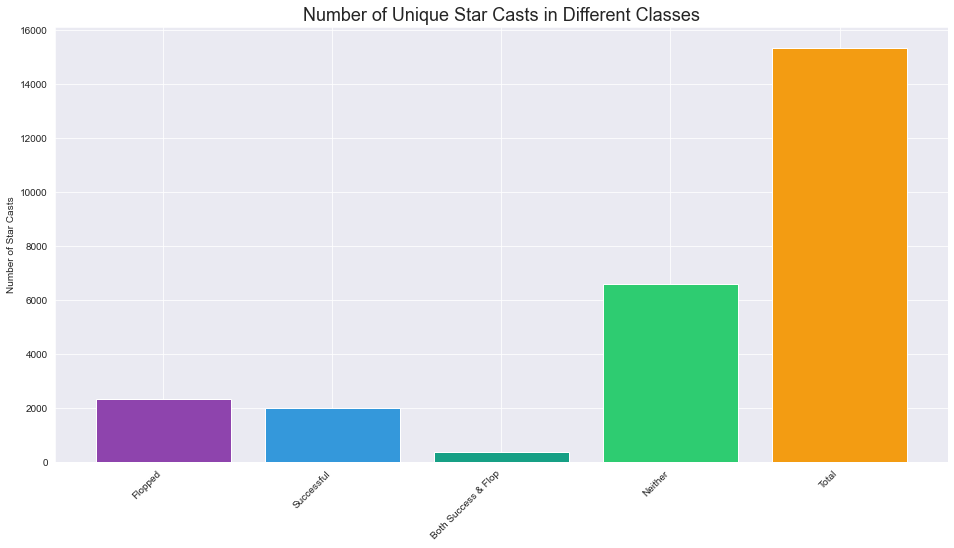

In [101]:
graph_df = pd.DataFrame({
    'ticks': ['Flopped', 'Successful', 'Both Success & Flop', 'Neither', 'Total'],
    'data': [unique_stars_in_flopped, unique_stars_in_successful, unique_stars_in_success_flop, unique_stars_in_neither, total_unique_casts]
})

plot_graph(
    graph_df, 'data', 'Number of Unique Star Casts in Different Classes',
    'Number of Star Casts', xticks='ticks', graph_type="bar", 
    color=['#8E44AD', '#3498DB', '#16A085', '#2ECC71', '#F39C12']
)

#### Q#2: Which star casts appear most frequently? (Top 20)
- On how many movies they appeared?
- What is their successful and flopped ratio?
- What is their movie to year ratio?

I need to group the data frame to answer these question.

In [102]:
# grouping the data frame based on cast column
cast_grouped = casts_df.groupby('cast')

# Finding the number of movies each cast appeared and get the top 20
cast_count = cast_grouped.original_title.agg('count').reset_index().sort_values('original_title', ascending=False).head(20)

<Figure size 432x288 with 0 Axes>

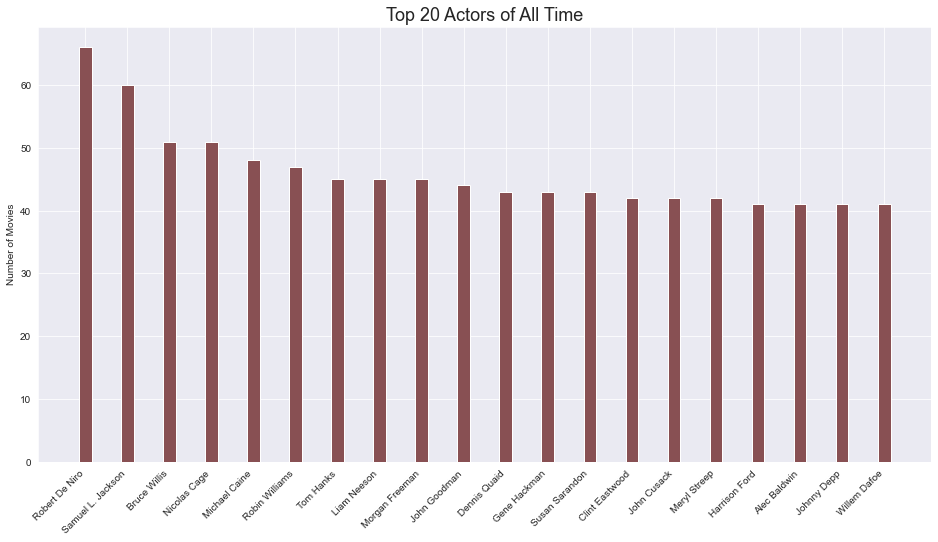

In [103]:
# Visualizing the graph
plot_graph(cast_count, "original_title", "Top 20 Actors of All Time", "Number of Movies", xticks="cast", graph_type="bar", width=0.3)

Let me calculate their success and flop ratio

In [104]:
# preparing cast count for computation
cast_count.set_index('cast', inplace=True)

# Getting the number of successful movies per cast
cast_success_count = casts_df[casts_df.cast.isin(cast_count.index) & casts_df.index.isin(successful.index)].groupby('cast').profit.agg('count')

# Getting the number of flopped movies per cast
cast_flop_count = casts_df[casts_df.cast.isin(cast_count.index) & casts_df.index.isin(flopped.index)].groupby('cast').budget.agg('count')

# Calculating the Success ratio
cast_success_ratio = cast_success_count / cast_count.original_title

# Calculating the Flop ratio
cast_flop_ratio = cast_flop_count / cast_count.original_title

# replace the NaN values if there is any
cast_success_ratio.fillna(0, inplace=True)
cast_flop_ratio.fillna(0, inplace=True)

Making a setup for Visualization

In [105]:
# Resetting the index
cast_success_ratio = cast_success_ratio.reset_index()
cast_flop_ratio = cast_flop_ratio.reset_index()

# Changing column names
cast_success_ratio.columns = ['cast', 'success']
cast_flop_ratio.columns = ['cast', 'flop']

# Merging the two columns
cast_both_ratio = pd.merge(cast_success_ratio, cast_flop_ratio, how="inner", on="cast")

In [106]:
# Reindexing to keep the rank
cast_both_ratio.set_index('cast', inplace=True)
cast_both_ratio = cast_both_ratio.reindex(cast_count.index)

Let me visualize it in a graph

<Figure size 432x288 with 0 Axes>

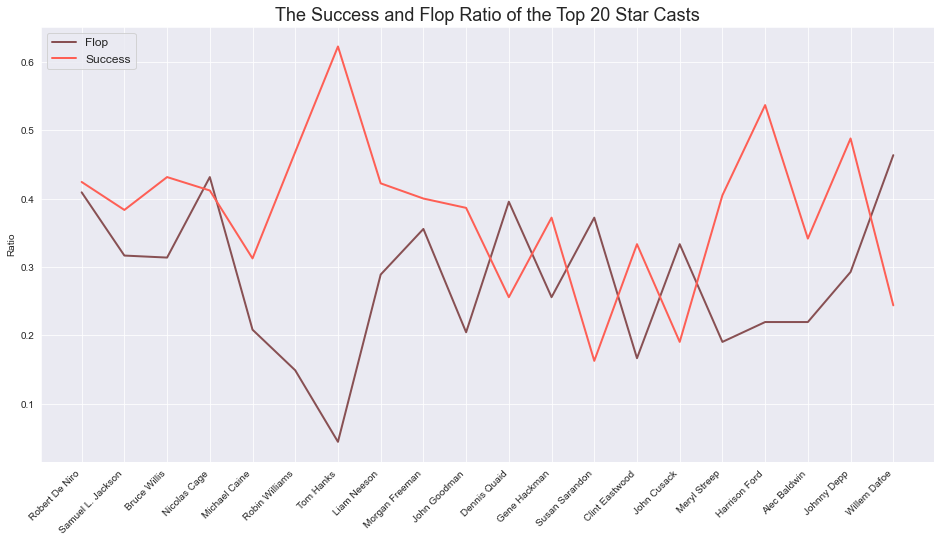

In [107]:
plot_graph(
    cast_both_ratio.reset_index(), ['flop', 'success'],
    'The Success and Flop Ratio of the Top 20 Star Casts',
    'Ratio', xticks='cast', linewidth=2, legend=['Flop', 'Success']
)

Let me try to calculate their movies to years ratio, i.e., the movies they was casted in divided by the years it took them

In [108]:
# Find the minimum and Max release_year the stars casted in
cast_years = cast_grouped \
    .agg({'release_year': ['min', 'max']})

# Filter out only the top ones
top_cast_years = cast_years[cast_years.index.isin(cast_count.index)]

# Finding the difference
top_cast_years = top_cast_years.apply(lambda x: x.loc[('release_year', 'max')] - x.loc[('release_year', 'min')], axis=1)

# Calculating movies to year ratio
movies_to_year_ratio = cast_count.original_title / top_cast_years

Let me visualize it

In [109]:
# reindexing to keep the rank
movies_to_year_ratio = movies_to_year_ratio.reindex(cast_count.index)
movies_to_year_ratio = movies_to_year_ratio.reset_index()
movies_to_year_ratio.columns = ['cast', 'ratio']

<Figure size 432x288 with 0 Axes>

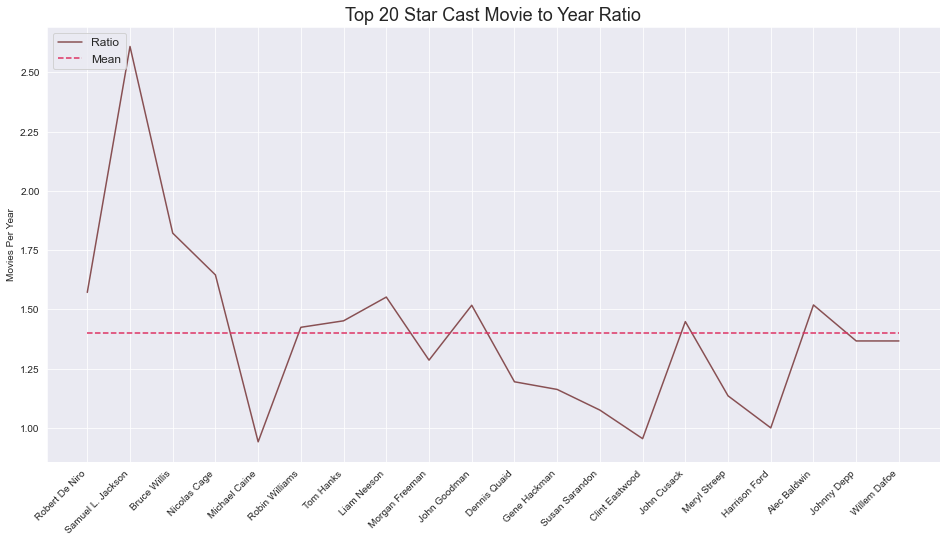

In [110]:
plot_graph(
    movies_to_year_ratio, 'ratio', 'Top 20 Star Cast Movie to Year Ratio',
    'Movies Per Year', xticks='cast', inc_mean=True
)

From the above graph I can conclude that in average the top 20 star actors act in minimum 1 movies per year.

<a id="budget_question"></a>
### Budget and Revenue Related Questions

Before answering each questions, visualizing the histogram might help on how to approach to answer the questions

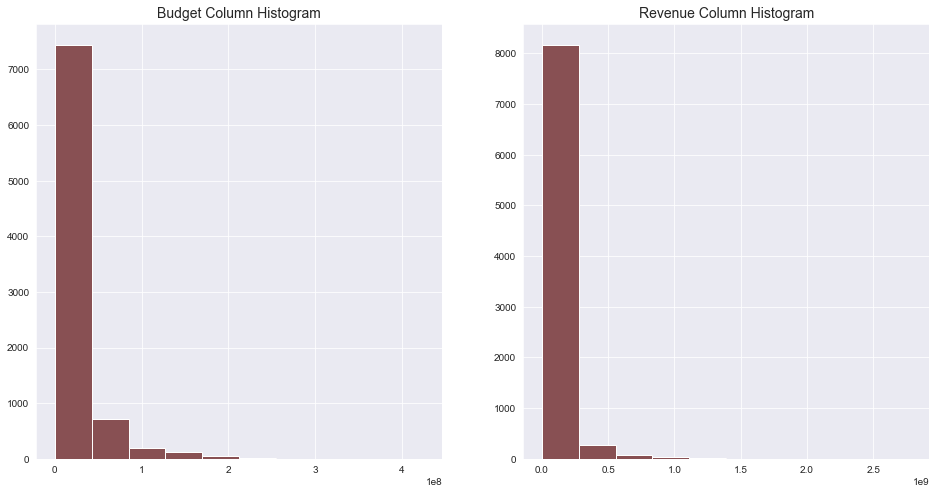

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].hist(tmdb.budget)
ax[0].set_title('Budget Column Histogram', fontsize=14)

ax[1].hist(tmdb.revenue)
ax[1].set_title('Revenue Column Histogram', fontsize=14);

Let me address each questions one by one

#### Q#1: What is the average budget for both commercial successful as well as flopped movies?

Let me answer the question using the already prepared `successful` and `flopped` dataset

<Figure size 432x288 with 0 Axes>

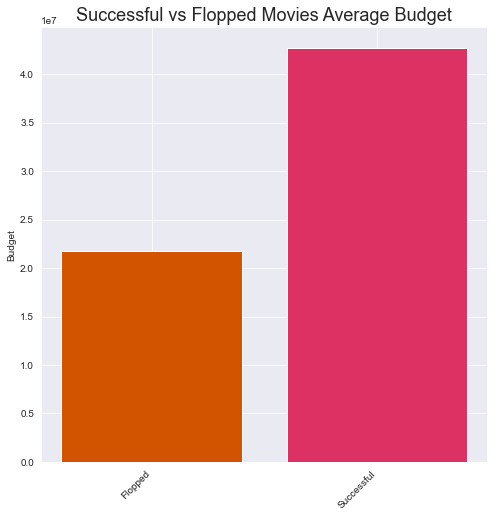

In [112]:
plot_graph(
    pd.DataFrame({'data': [flopped.budget.mean(), successful.budget.mean()], 'ticks': ['Flopped', 'Successful']}),
    'data', 'Successful vs Flopped Movies Average Budget', 'Budget', xticks='ticks', 
    figsize=(8, 8), graph_type='bar', color=[np.random.choice(my_colors), np.random.choice(my_colors)]
)

#### Q#2: How much percent of the Movies are Commercially successful as well as Flopped?


Using the above already filtered data, we can calculate the percent

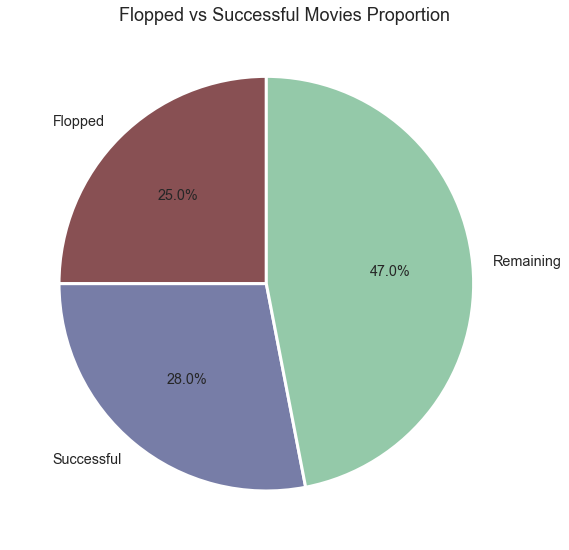

In [113]:
fig, ax = plt.subplots(figsize=(8, 8))
# Let's plot pie chart
plt.pie(
    [flopped.shape[0], successful.shape[0], tmdb.shape[0] - flopped.shape[0] - successful.shape[0]],
    labels=['Flopped', 'Successful', 'Remaining'],
    colors=['#885053', '#777DA7', '#94c9a9ff'], autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
plt.tight_layout()

plt.suptitle("Flopped vs Successful Movies Proportion", fontsize=18);

#### Q#3: What are the top 20 movies that got high profit proportion to their budget?

To answer this question, I first need to compute the proportion of profit to budget value then taking the highest 20

In [114]:
# Calculating the profit to budget proportion and getting the higher values
top_higher_profit = tmdb.apply(lambda x: x.profit / x.budget, axis=1).sort_values(ascending=False).head(20)

# Filtering the movies
top_higher_profit_movies = tmdb[tmdb.index.isin(top_higher_profit.index)]

# resetting an index so that I can preserve the ranking
top_higher_profit_movies = top_higher_profit_movies.reindex(top_higher_profit.index)

top_higher_profit_movies['profit_budget_proportion'] = top_higher_profit

In [115]:
top_higher_profit_movies[['original_title', 'budget', 'profit', 'profit_budget_proportion']].style.hide(axis='index')

original_title,budget,profit,profit_budget_proportion
"The Karate Kid, Part II",113.000000,115103866.000000,1018618.283186
Into the Night,114.000000,6699886.000000,58770.929825
From Prada to Nada,93.000000,2499907.000000,26880.720430
Paranormal Activity,15000.000000,193340800.000000,12889.386667
The Blair Witch Project,25000.000000,247975000.000000,9919.000000
"Love, Wedding, Marriage",1.000000,1377.000000,1377.000000
Eraserhead,10000.000000,6990000.000000,699.000000
Pink Flamingos,12000.000000,5988000.000000,499.000000
Super Size Me,65000.000000,28510078.000000,438.616585
The Gallows,100000.000000,42564410.000000,425.644100


Let me place the values in a graph

<Figure size 432x288 with 0 Axes>

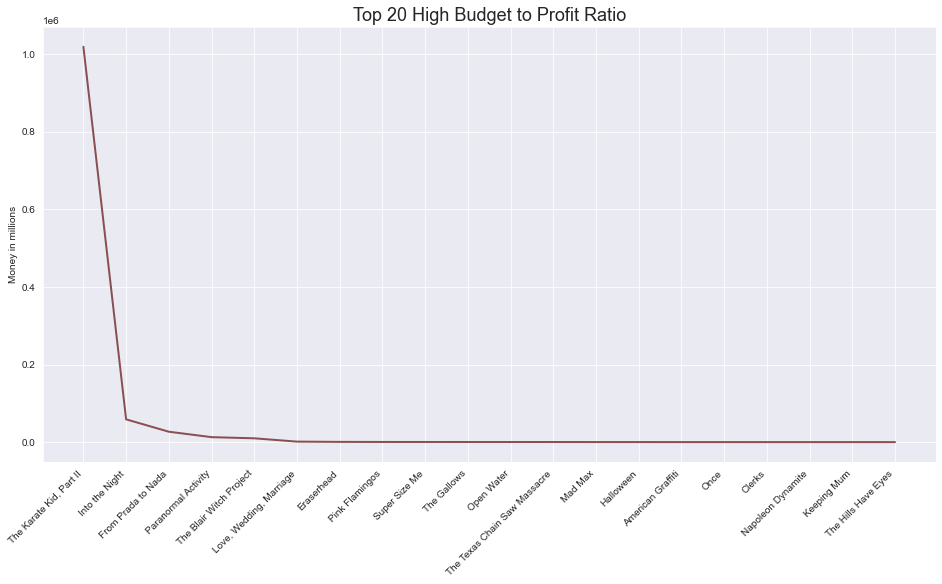

In [116]:
plot_graph(
    top_higher_profit_movies, 'profit_budget_proportion',
    'Top 20 High Budget to Profit Ratio',
    'Money in millions', linewidth=2
)

#### Q#4: What are the features associated with profit success?

- What are their relationship with Production Company, Director, Genre, and Cast features?

To answer this question I need to analyze the connection between the commercially `successful` movies and their features like Production Company, Director, Genre, and Cast.  
  
Are they produced by Top Production Company, Directed by Top Director, Have a Popular Genre, or Top Stars casted in it? What is their involvement percentage?

I use already defined data frames for this scenario.

In [117]:
# Filtering out the successful movies from the respective data frames
top_profit_directors = director_df[director_df.index.isin(successful.index)]
top_profit_casts = casts_df[casts_df.index.isin(successful.index)]
top_profit_productions = production_df[production_df.index.isin(successful.index)]
top_profit_genres = genre_df[genre_df.index.isin(successful.index)]

# Getting the number of successful movies
number_of_successful = successful.shape[0]

Let me calculate how many percent of `successful` movies directed by the top directors

In [118]:
top_profit_directors[top_profit_directors.director.isin(top_directors.index)].original_title.nunique() / number_of_successful * 100

6.044185077115465

Only `6%` of commercially successful movies are directed by top directors.

Let me find out for star casts next

In [119]:
top_profit_casts[top_profit_casts.cast.isin(cast_count.index)].original_title.nunique() / number_of_successful * 100

13.797415589829095

Only around `14%` of the top actors acted in the commercially successful movies.

Let me go ahead and find out for production companies then

In [120]:
top_profit_productions[top_profit_productions.production_companies.isin(top_production_companies.index)].original_title.nunique() / number_of_successful * 100

53.60566902876198

This is telling me something. Around `54%` of successful movies are produced by top production companies

Finally, let me check for top 5 highly popular genres

In [121]:
top_profit_genres[top_profit_genres.genres.isin(genre_popularity.genres[:5])].original_title.nunique() / number_of_successful * 100

48.22842851187995

Around `48%` of successful movies have a highly popular movie genre.

Seeing the above results, I can conclude that `Production Company` and type of `Genre` play a huge role in determining the movie profit than the other parameters.

#### Q#5: Does having more budget mean getting more popular or revenue?

Let me take the top 20 higher budget movies and see what their `popularity` and `profit` rank looks like

In [122]:
tmdb['popularity_rank'] = tmdb.popularity.rank(method='dense', ascending=False).astype(int)
tmdb['profit_rank'] = tmdb.profit.rank(method='dense', ascending=False).astype(int)

In [123]:
tmdb.sort_values('budget', ascending=False, axis=0).head(20) \
    [['budget', 'popularity', 'popularity_rank', 'profit_rank']].style.hide(axis='index')

budget,popularity,popularity_rank,profit_rank
425000000.000000,0.250540,6249,4744
380000000.000000,4.955130,87,53
300000000.000000,4.965391,86,50
280000000.000000,5.944927,55,8
270000000.000000,1.957331,572,700
260000000.000000,2.865684,282,193
260000000.000000,1.588457,827,1970
258000000.000000,2.520912,369,57
255000000.000000,1.214510,1252,4743
250000000.000000,4.840588,97,44


The above table clearly shows, having more budget doesn't mean getting more popular and/or profit.

#### Q#6: Does the `budget`, `revenue`, and `profit` growing over the years?

To answer this question, I just have to use the already computed data frame `years_mean` because everything is already done, what is left to do is visualize it.

In [124]:
# Computing the mean of profit for every year
years_mean['profit'] = tmdb.groupby('release_year').profit.mean().reindex(years_mean.index)

<Figure size 432x288 with 0 Axes>

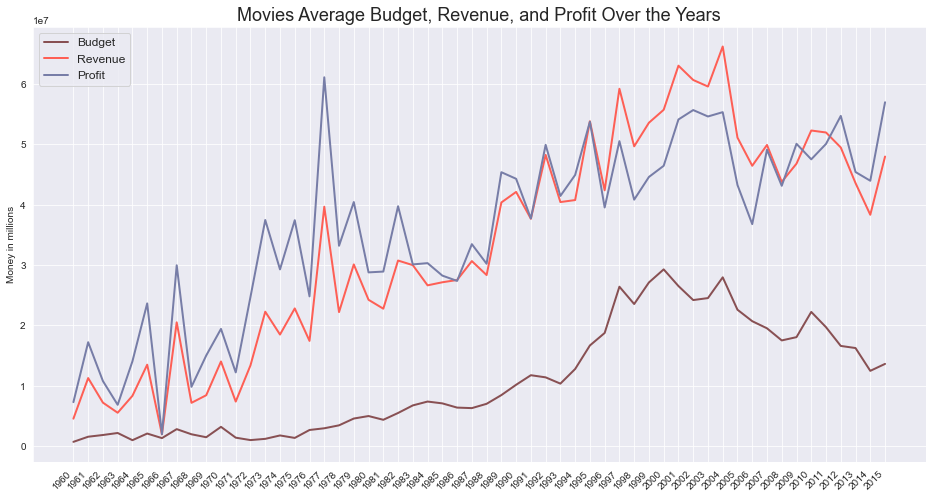

In [125]:
plot_graph(
    years_mean.reset_index(), ['budget', 'revenue', 'profit'],
    'Movies Average Budget, Revenue, and Profit Over the Years',
    'Money in millions', xticks='release_year', linewidth=2,
    legend=["Budget", "Revenue", "Profit"]
)

In general, I can say it it growing but there are some shake ups.

<a id="release_question"></a>
### Released Year Related Questions

#### Q#1: What year was the most successful year in the movie industry?
- How many successful movies got released that year?
- What was their average budget?
- What is the proportion of successful movies?

Before I tried to answer the question, let me calculate the movie counts for each year

In [126]:
# The number of Movies for each year
years_mean['count'] = tmdb.groupby('release_year').size().reindex(years_mean.index)
years_mean.head()

,budget,revenue,runtime,profit,count
release_year,,,,,
1960,6.892796e+05,4.531406e+06,110.656250,7.268005e+06,28
1961,1.537900e+06,1.125734e+07,119.866667,1.719680e+07,27
1962,1.824071e+06,7.185995e+06,125.833333,1.076298e+07,23
1963,2.156809e+06,5.511911e+06,111.323529,6.825705e+06,29
1964,9.630039e+05,8.316629e+06,111.195122,1.403618e+07,37


Let me answer the question now

In [127]:
# The most successful year
successful_year = years_mean[years_mean.profit == years_mean.profit.max()]
successful_year

,budget,revenue,runtime,profit,count
release_year,,,,,
1977,2.937818e+06,3.964697e+07,108.327273,6.109265e+07,47


In [128]:
shape_success = successful[successful.release_year == successful_year.index[0]].shape
shape_success[0]

31

`31` movies made it to the highest `25%` of `profit`

In [129]:
shape_success[0] / years_mean.loc[successful_year.index[0], 'count'] * 100

65.95744680851064

Almost `66%` of the movies made in `1977` were successful

#### Q#2: What year was the most unsuccessful year in the movie industry?
- How many flopped movies got released that year?
- What is the proportion of unsuccessful movies?

In [130]:
# The most unsuccessful year
flopped_year = years_mean[years_mean.profit == years_mean.profit.min()]
flopped_year

,budget,revenue,runtime,profit,count
release_year,,,,,
1966,1.308064e+06,1.925834e+06,108.590909,1.952360e+06,37


In [131]:
shape_flopped = flopped[flopped.release_year == flopped_year.index[0]].shape
shape_flopped[0]

33

In [132]:
shape_flopped[0] / years_mean.loc[flopped_year.index[0], 'count'] * 100

89.1891891891892

Almost `89%` of the movies made in year `1966` were unsuccessful, that's a huge number

#### Q#3: Which month has the highest released number of movies?
- Every year
- Over all

Before I answer the questions, let me group the dataset using `year` and `month`

In [133]:
# Grouping the data with year and month
year_month_group = tmdb.groupby([tmdb.release_date.dt.year, tmdb.release_date.dt.month_name()])

Since I am much concerned about the maximum number of releases, I can count the occurances of `original_title`

In [134]:
# Counting the number of `original_title`
year_month_count = year_month_group.original_title.agg('count')

# Finding the maximum value for each month
year_month_max = year_month_count.loc[year_month_count.groupby(level=0).idxmax()]

# Changing the index names
year_month_max.index.names = ['year', 'month']

# Checking the values
year_month_max.head(10)

year  month   
1960  October     5
1961  December    6
1962  June        6
1963  June        9
1964  October     8
1965  December    7
1966  December    8
1967  December    5
1968  December    5
1969  December    7
Name: original_title, dtype: int64

As listed in the above output, for each year there are different months and each month has different number of movies.  
  
Let me visualize them in a graph

<Figure size 432x288 with 0 Axes>

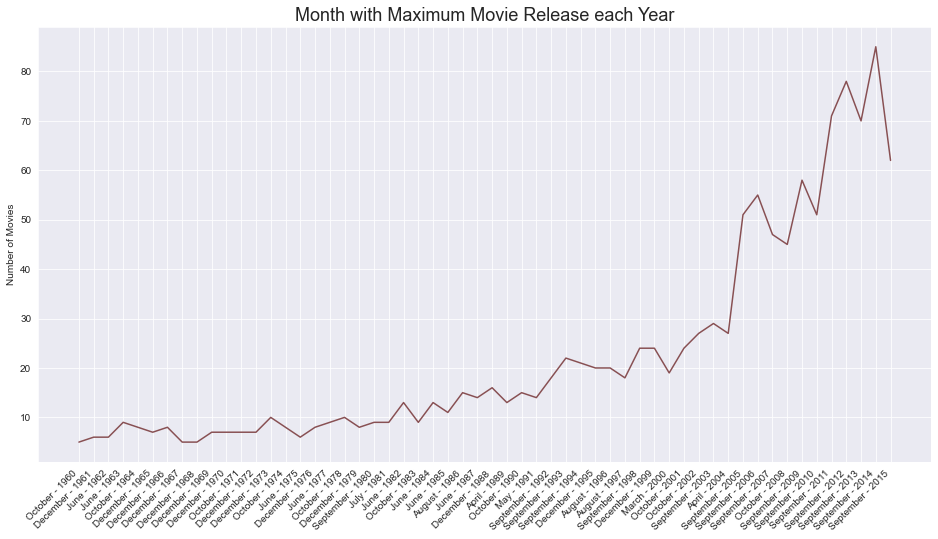

In [135]:
# Preparing tick labels for x-axis
x_ticks = [f"{x[1]} - {x[0]}" for x in list(year_month_max.index)]

plot_graph(
    pd.DataFrame({'ticks': x_ticks, 'data': list(year_month_max)}), 'data',
    'Month with Maximum Movie Release each Year', 'Number of Movies', xticks='ticks'
)

Now let me tackle the question what month have the highest movie release for the whole dataset

In [136]:
# Grouping the data
month_group = tmdb.groupby(tmdb.release_date.dt.month_name())

# As I did above, let me count the occurances of `original_title`
month_group_count = month_group.original_title.size()

# Let me sort the values to make highest and lowest month visualization easy
month_group_count = month_group_count.sort_values()

month_group_count

release_date
February      550
April         623
July          626
May           635
January       636
March         636
November      664
June          693
August        752
December      790
October       895
September    1056
Name: original_title, dtype: int64

Let's draw the graph and visualize it

In [137]:
month_group_count.reset_index()

,release_date,original_title
0,February,550
1,April,623
2,July,626
3,May,635
4,January,636
5,March,636
6,November,664
7,June,693
8,August,752
9,December,790


<Figure size 432x288 with 0 Axes>

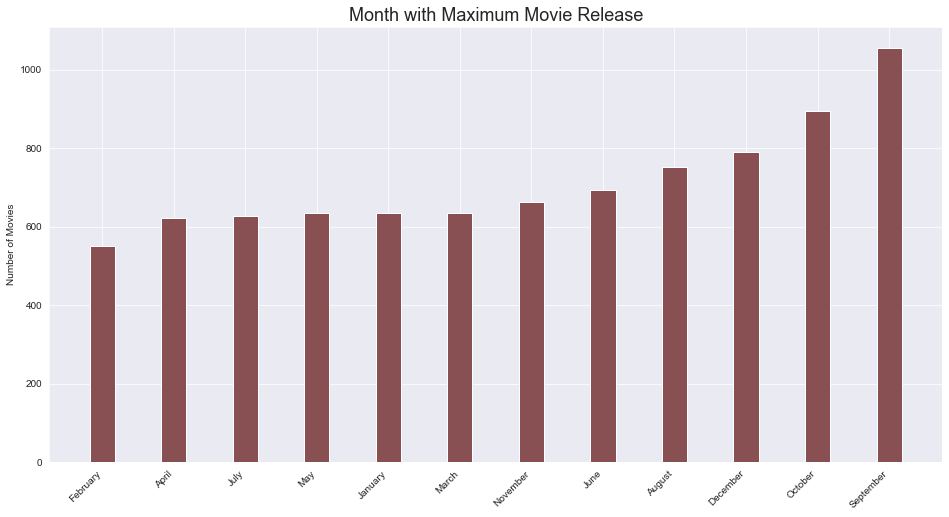

In [138]:
plot_graph(
    month_group_count.reset_index(), 'original_title',
    'Month with Maximum Movie Release', 'Number of Movies',
    width=0.35, xticks='release_date', graph_type="bar"
)

#### Q#4: Which month made the Highest Average Net Profit?
- Every year
- Over all

To answer this question, I can use the groups I created in the above question

In [139]:
# Calculating the average for the each month in the year
year_month_average = year_month_group.profit.mean()

# Finding the month with maximum average `profit`
year_month_average = year_month_average.loc[year_month_average.groupby(level=0).idxmax()]

# Changing index names
year_month_average.index.names = ['Year', 'Month']

year_month_average.head(10)

Year  Month    
1960  October      1.248628e+07
1961  January      6.025958e+07
1962  October      5.850000e+07
1963  October      3.987693e+07
1964  August       5.263636e+07
1965  March        8.321121e+07
1966  August       6.885000e+06
1967  October      7.551438e+07
1968  June         3.019543e+07
1969  September    5.163424e+07
Name: profit, dtype: float64

The above output shows I have different values for the month and average `profit` values.  
  
Let me visualize it in a graph

<Figure size 432x288 with 0 Axes>

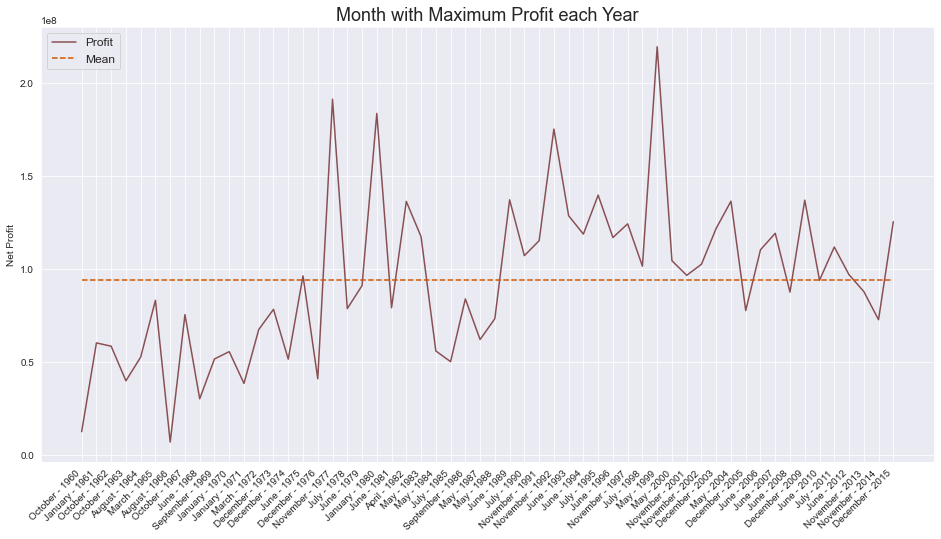

In [140]:
# Preparing tick labels for x-axis
x_ticks = [f"{x[1]} - {x[0]}" for x in list(year_month_average.index)]

plot_graph(
    pd.DataFrame({'ticks': x_ticks, 'profit': list(year_month_average)}),
    "profit", "Month with Maximum Profit each Year", "Net Profit",
    inc_mean=True, xticks='ticks'
)

From the above graph, the average `profit` is getting higher and higher even though it's is reaching high pick at times.  
  
Let me now compute for all the months starting from 1960 - 2015

In [141]:
# Again let me use the group I have already made for Q#3
# Let me find the mean for `profit` column
month_group_average = month_group.profit.mean()

# Let me sort the values to make visualization easy
month_group_average = month_group_average.sort_values()

# Let me check the values
month_group_average

release_date
September    2.411285e+07
January      2.582227e+07
August       3.100976e+07
February     3.144148e+07
October      3.241105e+07
April        3.887618e+07
March        4.265080e+07
November     5.918529e+07
July         5.948012e+07
December     6.033986e+07
May          6.649108e+07
June         7.338505e+07
Name: profit, dtype: float64

Let visualize it using graph

<Figure size 432x288 with 0 Axes>

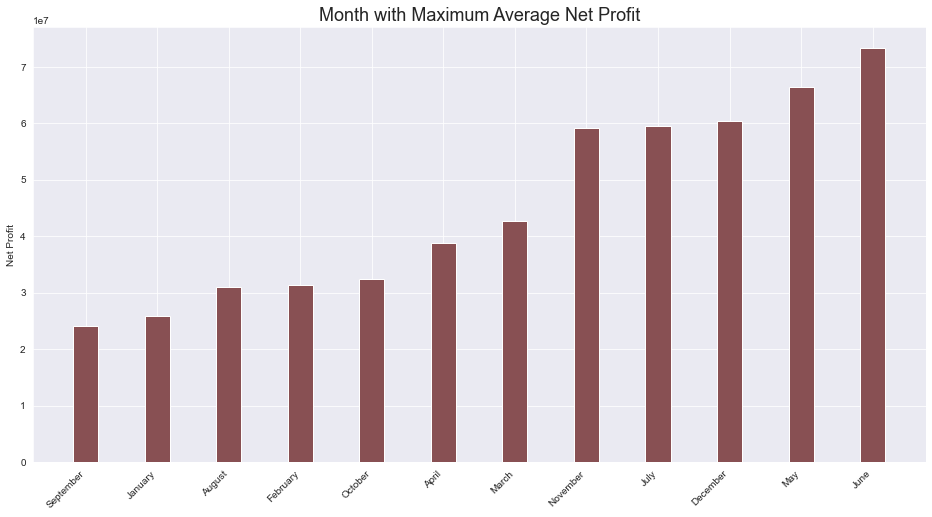

In [142]:
plot_graph(
    pd.DataFrame({'ticks': list(month_group_average.index), 'data': list(month_group_average)}),
    "data", "Month with Maximum Average Net Profit", "Net Profit",
    width=0.35, xticks='ticks', graph_type="bar"
)

#### Q#5: What is the average popularity for each year?
- Which year has the highest and lowest values?

In [143]:
# getting the popularity mean value for each year
years_mean['popularity'] = tmdb.groupby('release_year').popularity.mean().reindex(years_mean.index)

<Figure size 432x288 with 0 Axes>

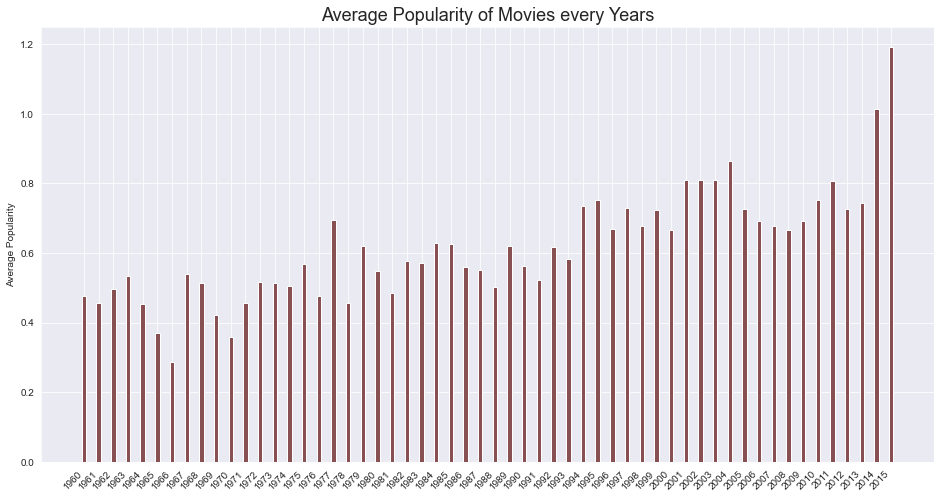

In [144]:
plot_graph(
    years_mean.reset_index(), 'popularity',
    "Average Popularity of Movies every Years", "Average Popularity",
    width=0.3, xticks="release_year", graph_type="bar"
)

#### Q#6: Does the number of released movies increased over the rears?

<Figure size 432x288 with 0 Axes>

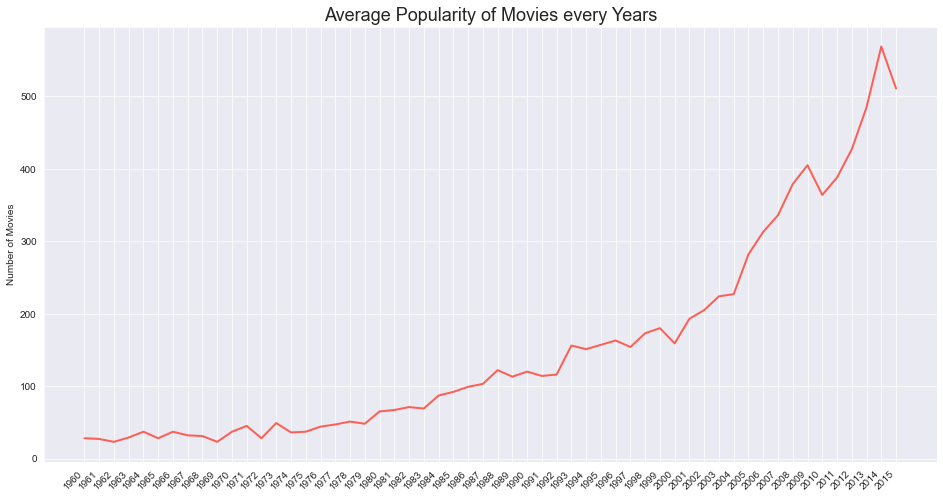

In [145]:
plot_graph(
    years_mean.reset_index(), 'count',
    "Average Popularity of Movies every Years", "Number of Movies",
    linewidth=2, xticks="release_year", color="#fe5f55ff"
)

<a id="conclusion"></a>
## Conclusion

The dataset isn't a collection of clean data points. It is filled with a bunch of outliers for most of it's columns which makes the data analysis so difficult. Cleaning the outliers drastically lowers the size of the dataset but working with a bunch of outlier also have a consequence; the conclusions that came out from analysing a data set with bunch of outlier might not be the perfect ones. Either way there is a risk attached to it. Me, I picked the risk of working with outliers and answered all the question listed in the <a href="#questions">Questions to Answer</a> section but the results are good.

<a id="resource"></a>
## Resources

The following links are the resources I used as a reference to analyse `The MDB` dataset.
  
- <a href="https://towardsdatascience.com/working-with-multi-index-pandas-dataframes-f64d2e2c3e02" target="_blank">Working with Multi-Index Pandas DataFrames</a>
- <a href="https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7" target="_blank">Apply and Lambda usage in pandas</a>
- <a href="https://towardsdatascience.com/wide-to-long-data-how-and-when-to-use-pandas-melt-stack-and-wide-to-long-7c1e0f462a98" target="_blank">Pandas Melt, Stack and wide_to_long For Reshaping Columns into Rows</a>
- <a href="https://stackoverflow.com/questions/22798934/pandas-long-to-wide-reshape-by-two-variables" target="_blank">Pandas long to wide reshape, by two variables</a>
- <a href="https://stackoverflow.com/questions/31843911/sorting-pandas-dataframe-by-order-of-another-index" target="_blank">Sorting Pandas Dataframe by order of another index</a>